# 타이타닉 생존자 데이터 분석

## 타이타닉호에서 어떤 승객이 생존했는지 데이터로부터 분석


1912년 4월 15일 타이타닉호 침몰로 2224명중 1502이 사망했다. 생존한 승객이 성별, 나이, 선실 등급과 어떤 관계가 있었는지를 분석한다.


## 주어진 데이터 내용

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton


## Load Dataset

'titanic_train.csv' 파일을 읽어서 변수 train에 저장하고,

PassengerId를 index로 지정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("titanic_train.csv", index_col=["PassengerId"])

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

### Encode Sex

'Sex_encode'라는 이름의 column을 생성하고 성별이 남자면 0, 여자면 1로 코딩

- .loc 활용

In [4]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


### Encode Embarked

Embarked column의 값이 C일 때, Q일 때, S일 때 값이 1이 되도록 원핫인코딩
- .get_dummies 활용

In [5]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [6]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 15)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,0,0,1
2,C,1,0,0
3,S,0,0,1
4,S,0,0,1
5,S,0,0,1


In [7]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
feature_names = ["Pclass", "Sex_encode", "Fare", "SibSp", "Parch",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train[feature_names], train['Survived'], random_state=42)

# kNN

n_neighbors를 조정해가면서 score 확인하기

In [15]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

n_neighbors가 3일 때

In [70]:
clrKN = KNeighborsClassifier(n_neighbors = 3)
train_knn = clrKN.fit(X_train,y_train)
# test_knn = clrKN.fit(X_test,y_test)


print("Training set score: {:.2f}".format(train_knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(train_knn.score(X_test, y_test)))

Training set score: 0.85
Test set score: 0.76


n_neighbors가 6일 때

In [71]:
clrKN = KNeighborsClassifier(n_neighbors = 6)
train_knn = clrKN.fit(X_train,y_train)
# test_knn = clrKN.fit(X_test,y_test)


print("Training set score: {:.2f}".format(train_knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(train_knn.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.79


n_neighbors가 9일 때

In [73]:
clrKN = KNeighborsClassifier(n_neighbors = 9)
train_knn = clrKN.fit(X_train,y_train)
# test_knn = clrKN.fit(X_test,y_test)


print("Training set score: {:.2f}".format(train_knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(train_knn.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.78


n_neighbors를 range(1, 11)에서 돌려서

각각의 training score, test score를 list 형태로 저장하고

training accuracy와 test accuracy의 그래프를 출력해 보세요

In [74]:
neighbors_settings = range(1,11)


[0.7533632286995515, 0.7488789237668162, 0.7623318385650224, 0.757847533632287, 0.7892376681614349, 0.7892376681614349, 0.7892376681614349, 0.7892376681614349, 0.7802690582959642, 0.757847533632287]


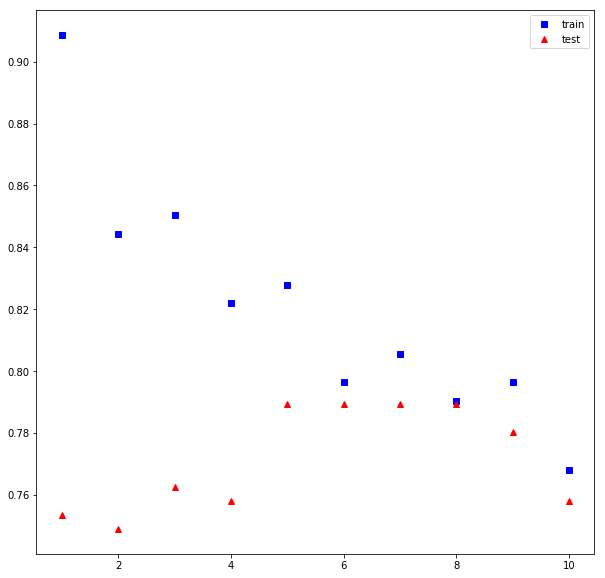

In [75]:
train_score = []
test_score = []

for i in neighbors_settings:
    clrKN = KNeighborsClassifier(n_neighbors = i)
    train_knn = clrKN.fit(X_train,y_train)
#     test_knn = clrKN.fit(X_test,y_test)
    train_score.append(train_knn.score(X_train, y_train))
    test_score.append(train_knn.score(X_test, y_test))

print(test_score)
plt.figure(figsize=(10,10))
plt.plot(neighbors_settings, train_score , 'bs', label = 'train')
plt.plot(neighbors_settings, test_score, 'r^', label = 'test')
plt.legend()
plt.show()

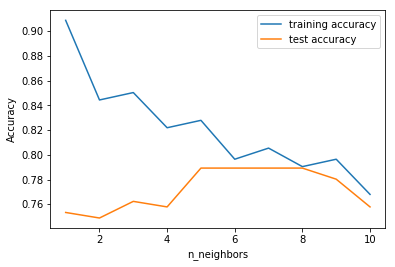

In [76]:
plt.plot(neighbors_settings, train_score, label="training accuracy")
plt.plot(neighbors_settings, test_score, label='test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

# Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

C를 조정해가면서 score 확인하기(L2)

C가 default일 때

In [77]:
clf = LogisticRegression(random_state = 2)
train_clf = clf.fit(X_train,y_train)
# test_clf = clf.fit(X_test,y_test)

print("Training set score: {:.3f}".format(train_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(train_clf.score(X_test,y_test)))

Training set score: 0.801
Test set score: 0.767


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C가 100일 때

In [78]:
clf = LogisticRegression(random_state = 2, C= 100)
train_clf = clf.fit(X_train,y_train)
# test_clf = clf.fit(X_test,y_test)

print("Training set score: {:.3f}".format(train_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(train_clf.score(X_test,y_test)))

Training set score: 0.798
Test set score: 0.767


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C가 0.01일 때

In [79]:
clf = LogisticRegression(random_state = 2, C= 0.01)
train_clf = clf.fit(X_train,y_train)
# test_clf = clf.fit(X_test,y_test)

print("Training set score: {:.3f}".format(train_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(train_clf.score(X_test,y_test)))

Training set score: 0.719
Test set score: 0.717


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C를 조정해가면서 score 확인하기(L1)

C가 default일 때

In [80]:
clf = LogisticRegression(random_state = 2, penalty ='l1' )
train_clf = clf.fit(X_train,y_train)
# test_clf = clf.fit(X_test,y_test)

print("Training set score: {:.3f}".format(train_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(train_clf.score(X_test,y_test)))

Training set score: 0.801
Test set score: 0.780


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C가 100일 때

In [83]:
clf = LogisticRegression(random_state = 2, C= 100, penalty ='l1' )
train_clf = clf.fit(X_train,y_train)
# test_clf = clf.fit(X_test,y_test)

print("Training set score: {:.3f}".format(train_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(train_clf.score(X_test,y_test)))

Training set score: 0.798
Test set score: 0.767


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C가 0.01일 때

In [82]:
clf = LogisticRegression(random_state = 2, C= 0.01, penalty ='l1' )
train_clf = clf.fit(X_train,y_train)
# test_clf = clf.fit(X_test,y_test)

print("Training set score: {:.3f}".format(train_clf.score(X_train,y_train)))
print("Test set score: {:.3f}".format(train_clf.score(X_test,y_test)))

Training set score: 0.677
Test set score: 0.686


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000000000004
0.05600000000000004
0.057000000000000044
0.058000000000000045
0.059000000000000045
0.060000000000000046
0.06100000000000005
0.06200000000000005
0.06300000000000004
0.06400000000000004
0.06500000000000004
0.06600000000000004
0.06700000000000005
0.06800000000000005
0.06900000000000005
0.07000000000000005
0.07100000000000005
0.07200000000000005
0.07300000000000005
0.07400000000000005
0.07500000000000005
0.07600000000000005
0.07700000000000005
0.07800000000000006
0.07900000000000006
0.08000000000000006
0.08100000000000006
0.08200000000000006
0.08300000000000006
0.08400000000000006
0.08500000000000006

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.08600000000000006
0.08700000000000006
0.08800000000000006
0.08900000000000007
0.09000000000000007
0.09100000000000007
0.09200000000000007
0.09300000000000007
0.09400000000000007
0.09500000000000007
0.09600000000000007
0.09700000000000007
0.09800000000000007
0.09900000000000007
0.10000000000000007
0.10100000000000008
0.10200000000000008
0.10300000000000008
0.10400000000000008
0.10500000000000008
0.10600000000000008
0.10700000000000008
0.10800000000000008
0.10900000000000008
0.11000000000000008
0.11100000000000008
0.11200000000000009
0.11300000000000009
0.11400000000000009
0.11500000000000009
0.11600000000000009
0.11700000000000009
0.11800000000000009
0.11900000000000009
0.12000000000000009
0.1210000000000001
0.1220000000000001
0.1230000000000001
0.1240000000000001
0.12500000000000008


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.12600000000000008
0.12700000000000009
0.12800000000000009
0.1290000000000001
0.1300000000000001
0.1310000000000001
0.1320000000000001
0.1330000000000001
0.1340000000000001
0.1350000000000001
0.1360000000000001
0.1370000000000001
0.1380000000000001
0.1390000000000001
0.1400000000000001
0.1410000000000001
0.1420000000000001
0.1430000000000001
0.1440000000000001
0.1450000000000001
0.1460000000000001
0.1470000000000001
0.1480000000000001
0.1490000000000001
0.1500000000000001
0.1510000000000001
0.1520000000000001
0.1530000000000001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.1540000000000001
0.1550000000000001
0.1560000000000001
0.1570000000000001
0.1580000000000001
0.1590000000000001
0.16000000000000011
0.16100000000000012
0.16200000000000012
0.16300000000000012
0.16400000000000012
0.16500000000000012
0.16600000000000012
0.16700000000000012
0.16800000000000012
0.16900000000000012
0.17000000000000012
0.17100000000000012
0.17200000000000013
0.17300000000000013
0.17400000000000013

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.17500000000000013
0.17600000000000013
0.17700000000000013
0.17800000000000013
0.17900000000000013
0.18000000000000013
0.18100000000000013
0.18200000000000013
0.18300000000000013
0.18400000000000014
0.18500000000000014
0.18600000000000014
0.18700000000000014
0.18800000000000014
0.18900000000000014
0.19000000000000014
0.19100000000000014
0.19200000000000014
0.19300000000000014
0.19400000000000014
0.19500000000000015
0.19600000000000015
0.19700000000000015
0.19800000000000015
0.19900000000000015
0.20000000000000015
0.20100000000000015

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.20200000000000015
0.20300000000000015
0.20400000000000015
0.20500000000000015
0.20600000000000016
0.20700000000000016
0.20800000000000016
0.20900000000000016
0.21000000000000016
0.21100000000000016
0.21200000000000016
0.21300000000000016
0.21400000000000016
0.21500000000000016
0.21600000000000016
0.21700000000000016
0.21800000000000017
0.21900000000000017
0.22000000000000017
0.22100000000000017
0.22200000000000017
0.22300000000000017
0.22400000000000017
0.22500000000000017
0.22600000000000017
0.22700000000000017
0.22800000000000017
0.22900000000000018
0.23000000000000018


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.23100000000000018
0.23200000000000018
0.23300000000000018
0.23400000000000018
0.23500000000000018
0.23600000000000018
0.23700000000000018
0.23800000000000018
0.23900000000000018
0.24000000000000019
0.2410000000000002
0.2420000000000002
0.2430000000000002
0.2440000000000002
0.2450000000000002
0.2460000000000002
0.2470000000000002
0.2480000000000002
0.2490000000000002
0.25000000000000017
0.25100000000000017
0.25200000000000017
0.25300000000000017
0.25400000000000017
0.25500000000000017
0.25600000000000017
0.2570000000000002
0.2580000000000002
0.2590000000000002
0.2600000000000002
0.2610000000000002
0.2620000000000002
0.2630000000000002
0.2640000000000002
0.2650000000000002
0.2660000000000002
0.2670000000000002
0.2680000000000002
0.2690000000000002
0.2700000000000002
0.2710000000000002
0.2720000000000002
0.2730000000000002

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.2740000000000002
0.2750000000000002
0.2760000000000002
0.2770000000000002
0.2780000000000002
0.2790000000000002
0.2800000000000002
0.2810000000000002
0.2820000000000002
0.2830000000000002
0.2840000000000002
0.2850000000000002
0.2860000000000002
0.2870000000000002
0.2880000000000002
0.2890000000000002
0.2900000000000002
0.2910000000000002
0.2920000000000002
0.2930000000000002
0.2940000000000002
0.2950000000000002
0.2960000000000002
0.2970000000000002
0.2980000000000002
0.2990000000000002
0.3000000000000002
0.3010000000000002
0.3020000000000002
0.3030000000000002
0.3040000000000002
0.3050000000000002
0.3060000000000002
0.3070000000000002
0.3080000000000002
0.3090000000000002
0.3100000000000002
0.3110000000000002
0.3120000000000002
0.3130000000000002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.3140000000000002
0.3150000000000002
0.3160000000000002
0.3170000000000002
0.3180000000000002
0.31900000000000023
0.32000000000000023
0.32100000000000023
0.32200000000000023
0.32300000000000023
0.32400000000000023
0.32500000000000023
0.32600000000000023
0.32700000000000023
0.32800000000000024
0.32900000000000024
0.33000000000000024
0.33100000000000024
0.33200000000000024
0.33300000000000024
0.33400000000000024
0.33500000000000024
0.33600000000000024
0.33700000000000024
0.33800000000000024
0.33900000000000025
0.34000000000000025
0.34100000000000025
0.34200000000000025
0.34300000000000025
0.34400000000000025
0.34500000000000025
0.34600000000000025
0.34700000000000025
0.34800000000000025
0.34900000000000025
0.35000000000000026
0.35100000000000026
0.35200000000000026
0.35300000000000026

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.35400000000000026
0.35500000000000026
0.35600000000000026
0.35700000000000026
0.35800000000000026
0.35900000000000026
0.36000000000000026
0.36100000000000027
0.36200000000000027
0.36300000000000027
0.36400000000000027
0.36500000000000027
0.36600000000000027
0.36700000000000027
0.36800000000000027
0.36900000000000027
0.3700000000000003
0.3710000000000003
0.3720000000000003
0.3730000000000003
0.3740000000000003
0.3750000000000003
0.3760000000000003
0.3770000000000003
0.3780000000000003
0.3790000000000003
0.3800000000000003
0.3810000000000003
0.3820000000000003
0.3830000000000003
0.3840000000000003
0.3850000000000003
0.3860000000000003
0.3870000000000003
0.3880000000000003
0.3890000000000003
0.3900000000000003
0.3910000000000003
0.3920000000000003
0.3930000000000003
0.3940000000000003


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.3950000000000003
0.3960000000000003
0.3970000000000003
0.3980000000000003
0.3990000000000003
0.4000000000000003
0.4010000000000003
0.4020000000000003
0.4030000000000003
0.4040000000000003
0.4050000000000003
0.4060000000000003
0.4070000000000003
0.4080000000000003
0.4090000000000003
0.4100000000000003
0.4110000000000003
0.4120000000000003
0.4130000000000003
0.4140000000000003
0.4150000000000003
0.4160000000000003
0.4170000000000003
0.4180000000000003
0.4190000000000003
0.4200000000000003
0.4210000000000003
0.4220000000000003
0.4230000000000003
0.4240000000000003
0.4250000000000003
0.4260000000000003
0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.47300000000000036
0.47400000000000037
0.47500000000000037


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.47600000000000037
0.47700000000000037
0.47800000000000037
0.47900000000000037
0.48000000000000037
0.48100000000000037
0.4820000000000004
0.4830000000000004
0.4840000000000004
0.4850000000000004
0.4860000000000004
0.4870000000000004
0.4880000000000004
0.4890000000000004
0.4900000000000004
0.4910000000000004
0.4920000000000004
0.4930000000000004
0.4940000000000004
0.4950000000000004
0.4960000000000004
0.4970000000000004
0.4980000000000004
0.4990000000000004
0.5000000000000003
0.5010000000000003
0.5020000000000003
0.5030000000000003
0.5040000000000003
0.5050000000000003
0.5060000000000003
0.5070000000000003
0.5080000000000003
0.5090000000000003
0.5100000000000003
0.5110000000000003
0.5120000000000003


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5130000000000003
0.5140000000000003
0.5150000000000003
0.5160000000000003
0.5170000000000003
0.5180000000000003
0.5190000000000003
0.5200000000000004
0.5210000000000004
0.5220000000000004
0.5230000000000004
0.5240000000000004
0.5250000000000004
0.5260000000000004
0.5270000000000004
0.5280000000000004
0.5290000000000004
0.5300000000000004
0.5310000000000004
0.5320000000000004
0.5330000000000004
0.5340000000000004
0.5350000000000004
0.5360000000000004
0.5370000000000004
0.5380000000000004
0.5390000000000004
0.5400000000000004
0.5410000000000004
0.5420000000000004
0.5430000000000004
0.5440000000000004
0.5450000000000004
0.5460000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5470000000000004
0.5480000000000004
0.5490000000000004
0.5500000000000004
0.5510000000000004
0.5520000000000004
0.5530000000000004
0.5540000000000004
0.5550000000000004
0.5560000000000004
0.5570000000000004
0.5580000000000004
0.5590000000000004
0.5600000000000004
0.5610000000000004
0.5620000000000004
0.5630000000000004
0.5640000000000004
0.5650000000000004
0.5660000000000004
0.5670000000000004
0.5680000000000004
0.5690000000000004
0.5700000000000004
0.5710000000000004
0.5720000000000004
0.5730000000000004
0.5740000000000004
0.5750000000000004
0.5760000000000004
0.5770000000000004
0.5780000000000004
0.5790000000000004
0.5800000000000004
0.5810000000000004
0.5820000000000004
0.5830000000000004
0.5840000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.5850000000000004
0.5860000000000004
0.5870000000000004
0.5880000000000004
0.5890000000000004
0.5900000000000004
0.5910000000000004
0.5920000000000004
0.5930000000000004
0.5940000000000004
0.5950000000000004
0.5960000000000004
0.5970000000000004
0.5980000000000004
0.5990000000000004
0.6000000000000004
0.6010000000000004
0.6020000000000004
0.6030000000000004
0.6040000000000004
0.6050000000000004
0.6060000000000004
0.6070000000000004
0.6080000000000004
0.6090000000000004
0.6100000000000004
0.6110000000000004
0.6120000000000004
0.6130000000000004
0.6140000000000004
0.6150000000000004
0.6160000000000004
0.6170000000000004
0.6180000000000004
0.6190000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.6200000000000004
0.6210000000000004
0.6220000000000004
0.6230000000000004
0.6240000000000004
0.6250000000000004
0.6260000000000004
0.6270000000000004
0.6280000000000004
0.6290000000000004
0.6300000000000004
0.6310000000000004
0.6320000000000005
0.6330000000000005
0.6340000000000005
0.6350000000000005
0.6360000000000005
0.6370000000000005
0.6380000000000005
0.6390000000000005
0.6400000000000005
0.6410000000000005
0.6420000000000005
0.6430000000000005
0.6440000000000005
0.6450000000000005
0.6460000000000005
0.6470000000000005
0.6480000000000005
0.6490000000000005
0.6500000000000005
0.6510000000000005
0.6520000000000005
0.6530000000000005
0.6540000000000005
0.6550000000000005
0.6560000000000005
0.6570000000000005
0.6580000000000005
0.6590000000000005
0.6600000000000005
0.6610000000000005

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.6620000000000005
0.6630000000000005
0.6640000000000005
0.6650000000000005
0.6660000000000005
0.6670000000000005
0.6680000000000005
0.6690000000000005
0.6700000000000005
0.6710000000000005
0.6720000000000005
0.6730000000000005
0.6740000000000005
0.6750000000000005
0.6760000000000005
0.6770000000000005
0.6780000000000005
0.6790000000000005
0.6800000000000005
0.6810000000000005
0.6820000000000005
0.6830000000000005
0.6840000000000005
0.6850000000000005
0.6860000000000005
0.6870000000000005
0.6880000000000005
0.6890000000000005
0.6900000000000005
0.6910000000000005
0.6920000000000005
0.6930000000000005
0.6940000000000005
0.6950000000000005
0.6960000000000005
0.6970000000000005
0.6980000000000005
0.6990000000000005
0.7000000000000005
0.7010000000000005
0.7020000000000005
0.7030000000000005

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.7040000000000005
0.7050000000000005
0.7060000000000005
0.7070000000000005
0.7080000000000005
0.7090000000000005
0.7100000000000005
0.7110000000000005
0.7120000000000005
0.7130000000000005
0.7140000000000005
0.7150000000000005
0.7160000000000005
0.7170000000000005
0.7180000000000005
0.7190000000000005
0.7200000000000005
0.7210000000000005
0.7220000000000005
0.7230000000000005
0.7240000000000005
0.7250000000000005
0.7260000000000005
0.7270000000000005
0.7280000000000005
0.7290000000000005
0.7300000000000005
0.7310000000000005
0.7320000000000005
0.7330000000000005
0.7340000000000005
0.7350000000000005
0.7360000000000005
0.7370000000000005
0.7380000000000005
0.7390000000000005
0.7400000000000005
0.7410000000000005
0.7420000000000005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.7430000000000005
0.7440000000000005
0.7450000000000006
0.7460000000000006
0.7470000000000006
0.7480000000000006
0.7490000000000006
0.7500000000000006
0.7510000000000006
0.7520000000000006
0.7530000000000006
0.7540000000000006
0.7550000000000006
0.7560000000000006
0.7570000000000006
0.7580000000000006
0.7590000000000006
0.7600000000000006
0.7610000000000006
0.7620000000000006
0.7630000000000006
0.7640000000000006
0.7650000000000006
0.7660000000000006
0.7670000000000006
0.7680000000000006
0.7690000000000006
0.7700000000000006
0.7710000000000006
0.7720000000000006
0.7730000000000006
0.7740000000000006
0.7750000000000006
0.7760000000000006
0.7770000000000006
0.7780000000000006
0.7790000000000006
0.7800000000000006
0.7810000000000006
0.7820000000000006

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.7830000000000006
0.7840000000000006
0.7850000000000006
0.7860000000000006
0.7870000000000006
0.7880000000000006
0.7890000000000006
0.7900000000000006
0.7910000000000006
0.7920000000000006
0.7930000000000006
0.7940000000000006
0.7950000000000006
0.7960000000000006
0.7970000000000006
0.7980000000000006
0.7990000000000006
0.8000000000000006
0.8010000000000006
0.8020000000000006
0.8030000000000006
0.8040000000000006
0.8050000000000006
0.8060000000000006
0.8070000000000006
0.8080000000000006
0.8090000000000006
0.8100000000000006
0.8110000000000006
0.8120000000000006
0.8130000000000006
0.8140000000000006
0.8150000000000006
0.8160000000000006
0.8170000000000006
0.8180000000000006
0.8190000000000006
0.8200000000000006

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.8210000000000006
0.8220000000000006
0.8230000000000006
0.8240000000000006
0.8250000000000006
0.8260000000000006
0.8270000000000006
0.8280000000000006
0.8290000000000006
0.8300000000000006
0.8310000000000006
0.8320000000000006
0.8330000000000006
0.8340000000000006
0.8350000000000006
0.8360000000000006
0.8370000000000006
0.8380000000000006
0.8390000000000006
0.8400000000000006
0.8410000000000006
0.8420000000000006
0.8430000000000006
0.8440000000000006
0.8450000000000006
0.8460000000000006
0.8470000000000006
0.8480000000000006
0.8490000000000006
0.8500000000000006
0.8510000000000006
0.8520000000000006
0.8530000000000006
0.8540000000000006
0.8550000000000006
0.8560000000000006
0.8570000000000007
0.8580000000000007
0.8590000000000007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000000007
0.9050000000000007
0.9060000000000007
0.9070000000000007
0.9080000000000007
0.9090000000000007
0.9100000000000007
0.9110000000000007
0.9120000000000007
0.9130000000000007
0.9140000000000007
0.9150000000000007
0.9160000000000007
0.9170000000000007
0.9180000000000007
0.9190000000000007
0.9200000000000007
0.9210000000000007
0.9220000000000007
0.9230000000000007
0.9240000000000007
0.9250000000000007
0.9260000000000007
0.9270000000000007
0.9280000000000007
0.9290000000000007
0.9300000000000007
0.9310000000000007
0.9320000000000007
0.9330000000000007
0.9340000000000007
0.9350000000000007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.9360000000000007
0.9370000000000007
0.9380000000000007
0.9390000000000007
0.9400000000000007
0.9410000000000007
0.9420000000000007
0.9430000000000007
0.9440000000000007
0.9450000000000007
0.9460000000000007
0.9470000000000007
0.9480000000000007
0.9490000000000007
0.9500000000000007
0.9510000000000007
0.9520000000000007
0.9530000000000007
0.9540000000000007
0.9550000000000007
0.9560000000000007
0.9570000000000007
0.9580000000000007
0.9590000000000007
0.9600000000000007
0.9610000000000007
0.9620000000000007
0.9630000000000007
0.9640000000000007
0.9650000000000007
0.9660000000000007
0.9670000000000007
0.9680000000000007
0.9690000000000007
0.9700000000000008
0.9710000000000008


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.9720000000000008
0.9730000000000008
0.9740000000000008
0.9750000000000008
0.9760000000000008
0.9770000000000008
0.9780000000000008
0.9790000000000008
0.9800000000000008
0.9810000000000008
0.9820000000000008
0.9830000000000008
0.9840000000000008
0.9850000000000008
0.9860000000000008
0.9870000000000008
0.9880000000000008
0.9890000000000008
0.9900000000000008
0.9910000000000008
0.9920000000000008
0.9930000000000008
0.9940000000000008
0.9950000000000008
0.9960000000000008
0.9970000000000008
0.9980000000000008
0.9990000000000008
1.0000000000000007
1.0010000000000006
1.0020000000000004
1.0030000000000003
1.0040000000000002
1.0050000000000001
1.006
1.007

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.0079999999999998
1.0089999999999997
1.0099999999999996
1.0109999999999995
1.0119999999999993
1.0129999999999992
1.0139999999999991
1.014999999999999
1.015999999999999
1.0169999999999988
1.0179999999999987
1.0189999999999986
1.0199999999999985
1.0209999999999984
1.0219999999999982
1.0229999999999981
1.023999999999998
1.024999999999998
1.0259999999999978
1.0269999999999977
1.0279999999999976
1.0289999999999975
1.0299999999999974
1.0309999999999973
1.0319999999999971
1.032999999999997
1.033999999999997
1.0349999999999968
1.0359999999999967
1.0369999999999966
1.0379999999999965
1.0389999999999964
1.0399999999999963
1.0409999999999962
1.041999999999996
1.042999999999996
1.0439999999999958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.0449999999999957
1.0459999999999956
1.0469999999999955
1.0479999999999954
1.0489999999999953
1.0499999999999952
1.050999999999995
1.051999999999995
1.0529999999999948
1.0539999999999947
1.0549999999999946
1.0559999999999945
1.0569999999999944
1.0579999999999943
1.0589999999999942
1.059999999999994
1.060999999999994
1.0619999999999938
1.0629999999999937
1.0639999999999936
1.0649999999999935
1.0659999999999934
1.0669999999999933
1.0679999999999932
1.068999999999993
1.069999999999993
1.0709999999999928
1.0719999999999927
1.0729999999999926
1.0739999999999925
1.0749999999999924
1.0759999999999923
1.0769999999999922
1.077999999999992
1.078999999999992

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.0799999999999919
1.0809999999999917
1.0819999999999916
1.0829999999999915
1.0839999999999914
1.0849999999999913
1.0859999999999912
1.086999999999991
1.087999999999991
1.0889999999999909
1.0899999999999908
1.0909999999999906
1.0919999999999905
1.0929999999999904
1.0939999999999903
1.0949999999999902
1.09599999999999
1.09699999999999
1.0979999999999899
1.0989999999999898
1.0999999999999897
1.1009999999999895
1.1019999999999894
1.1029999999999893
1.1039999999999892
1.104999999999989
1.105999999999989
1.1069999999999889
1.1079999999999888
1.1089999999999887
1.1099999999999886
1.1109999999999884
1.1119999999999883
1.1129999999999882
1.113999999999988


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.114999999999988
1.115999999999988
1.1169999999999878
1.1179999999999877
1.1189999999999876
1.1199999999999875
1.1209999999999873
1.1219999999999872
1.1229999999999871
1.123999999999987
1.124999999999987
1.1259999999999868
1.1269999999999867
1.1279999999999866
1.1289999999999865
1.1299999999999863
1.1309999999999862
1.1319999999999861
1.132999999999986
1.133999999999986
1.1349999999999858
1.1359999999999857
1.1369999999999856
1.1379999999999855
1.1389999999999854
1.1399999999999852
1.1409999999999851
1.141999999999985
1.142999999999985
1.1439999999999848
1.1449999999999847
1.1459999999999846


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.1469999999999845
1.1479999999999844
1.1489999999999843
1.1499999999999841
1.150999999999984
1.151999999999984
1.1529999999999838
1.1539999999999837
1.1549999999999836
1.1559999999999835
1.1569999999999834
1.1579999999999833
1.1589999999999832
1.159999999999983
1.160999999999983
1.1619999999999828
1.1629999999999827
1.1639999999999826
1.1649999999999825
1.1659999999999824
1.1669999999999823
1.1679999999999822
1.168999999999982
1.169999999999982
1.1709999999999818
1.1719999999999817
1.1729999999999816
1.1739999999999815
1.1749999999999814
1.1759999999999813
1.1769999999999812
1.177999999999981
1.178999999999981
1.1799999999999808
1.1809999999999807

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.1819999999999806
1.1829999999999805
1.1839999999999804
1.1849999999999803
1.1859999999999802
1.18699999999998
1.18799999999998
1.1889999999999799
1.1899999999999797
1.1909999999999796
1.1919999999999795
1.1929999999999794
1.1939999999999793
1.1949999999999792
1.195999999999979
1.196999999999979
1.1979999999999789
1.1989999999999787
1.1999999999999786
1.2009999999999785
1.2019999999999784
1.2029999999999783
1.2039999999999782
1.204999999999978
1.205999999999978
1.2069999999999779
1.2079999999999778


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.2089999999999776
1.2099999999999775
1.2109999999999774
1.2119999999999773
1.2129999999999772
1.213999999999977
1.214999999999977
1.2159999999999769
1.2169999999999768
1.2179999999999767
1.2189999999999765
1.2199999999999764
1.2209999999999763
1.2219999999999762
1.222999999999976
1.223999999999976
1.2249999999999759
1.2259999999999758
1.2269999999999757
1.2279999999999756
1.2289999999999754
1.2299999999999753
1.2309999999999752
1.2319999999999751
1.232999999999975
1.233999999999975
1.2349999999999748
1.2359999999999747
1.2369999999999746
1.2379999999999745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.2389999999999743
1.2399999999999742
1.2409999999999741
1.241999999999974
1.242999999999974
1.2439999999999738
1.2449999999999737
1.2459999999999736
1.2469999999999735
1.2479999999999734
1.2489999999999732
1.2499999999999731
1.250999999999973
1.251999999999973
1.2529999999999728
1.2539999999999727
1.2549999999999726
1.2559999999999725
1.2569999999999724
1.2579999999999723
1.2589999999999721
1.259999999999972
1.260999999999972
1.2619999999999718
1.2629999999999717
1.2639999999999716
1.2649999999999715
1.2659999999999714
1.2669999999999713
1.2679999999999712
1.268999999999971
1.269999999999971
1.2709999999999708
1.2719999999999707
1.2729999999999706
1.2739999999999705

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.2749999999999704
1.2759999999999703
1.2769999999999702
1.27799999999997
1.27899999999997
1.2799999999999698
1.2809999999999697
1.2819999999999696
1.2829999999999695
1.2839999999999694
1.2849999999999693
1.2859999999999692
1.286999999999969
1.287999999999969
1.2889999999999688
1.2899999999999687
1.2909999999999686
1.2919999999999685
1.2929999999999684
1.2939999999999683
1.2949999999999682
1.295999999999968
1.296999999999968
1.2979999999999678
1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.341999999999963


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.342999999999963
1.3439999999999628
1.3449999999999627
1.3459999999999626
1.3469999999999624
1.3479999999999623
1.3489999999999622
1.3499999999999621
1.350999999999962
1.351999999999962
1.3529999999999618
1.3539999999999617
1.3549999999999616
1.3559999999999615
1.3569999999999613
1.3579999999999612
1.3589999999999611
1.359999999999961
1.360999999999961
1.3619999999999608
1.3629999999999607
1.3639999999999606
1.3649999999999605
1.3659999999999604
1.3669999999999602
1.3679999999999601
1.36899999999996
1.36999999999996
1.3709999999999598
1.3719999999999597
1.3729999999999596
1.3739999999999595
1.3749999999999594
1.3759999999999593


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.3769999999999591
1.377999999999959
1.378999999999959
1.3799999999999588
1.3809999999999587
1.3819999999999586
1.3829999999999585
1.3839999999999584
1.3849999999999583
1.3859999999999582
1.386999999999958
1.387999999999958
1.3889999999999578
1.3899999999999577
1.3909999999999576
1.3919999999999575
1.3929999999999574
1.3939999999999573
1.3949999999999572
1.395999999999957
1.396999999999957
1.3979999999999568
1.3989999999999567
1.3999999999999566
1.4009999999999565
1.4019999999999564
1.4029999999999563
1.4039999999999562
1.404999999999956
1.405999999999956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.4069999999999558
1.4079999999999557
1.4089999999999556
1.4099999999999555
1.4109999999999554
1.4119999999999553
1.4129999999999552
1.413999999999955
1.414999999999955
1.4159999999999549
1.4169999999999547
1.4179999999999546
1.4189999999999545
1.4199999999999544
1.4209999999999543
1.4219999999999542
1.422999999999954
1.423999999999954
1.4249999999999539
1.4259999999999537
1.4269999999999536
1.4279999999999535
1.4289999999999534
1.4299999999999533
1.4309999999999532
1.431999999999953
1.432999999999953
1.4339999999999529
1.4349999999999528
1.4359999999999526
1.4369999999999525
1.4379999999999524
1.4389999999999523
1.4399999999999522
1.440999999999952
1.441999999999952


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.4429999999999519
1.4439999999999518
1.4449999999999517
1.4459999999999515
1.4469999999999514
1.4479999999999513
1.4489999999999512
1.449999999999951
1.450999999999951
1.4519999999999509
1.4529999999999508
1.4539999999999507
1.4549999999999506
1.4559999999999504
1.4569999999999503
1.4579999999999502
1.4589999999999501
1.45999999999995
1.46099999999995
1.4619999999999498
1.4629999999999497
1.4639999999999496
1.4649999999999495
1.4659999999999493
1.4669999999999492
1.4679999999999491
1.468999999999949
1.469999999999949
1.4709999999999488
1.4719999999999487
1.4729999999999486
1.4739999999999485
1.4749999999999484
1.4759999999999482
1.4769999999999481
1.477999999999948
1.478999999999948
1.4799999999999478
1.4809999999999477

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.4819999999999476
1.4829999999999475
1.4839999999999474
1.4849999999999473
1.4859999999999471
1.486999999999947
1.487999999999947
1.4889999999999468
1.4899999999999467
1.4909999999999466
1.4919999999999465
1.4929999999999464
1.4939999999999463
1.4949999999999461
1.495999999999946
1.496999999999946
1.4979999999999458
1.4989999999999457
1.4999999999999456
1.5009999999999455
1.5019999999999454
1.5029999999999453
1.5039999999999452
1.504999999999945
1.505999999999945
1.5069999999999448
1.5079999999999447
1.5089999999999446
1.5099999999999445
1.5109999999999444
1.5119999999999443
1.5129999999999442
1.513999999999944
1.514999999999944
1.5159999999999438
1.5169999999999437


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.5179999999999436
1.5189999999999435
1.5199999999999434
1.5209999999999433
1.5219999999999432
1.522999999999943
1.523999999999943
1.5249999999999428
1.5259999999999427
1.5269999999999426
1.5279999999999425
1.5289999999999424
1.5299999999999423
1.5309999999999422
1.531999999999942
1.532999999999942
1.5339999999999419
1.5349999999999417
1.5359999999999416
1.5369999999999415
1.5379999999999414
1.5389999999999413
1.5399999999999412
1.540999999999941
1.541999999999941
1.5429999999999409
1.5439999999999408
1.5449999999999406
1.5459999999999405
1.5469999999999404
1.5479999999999403
1.5489999999999402


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.54999999999994
1.55099999999994
1.5519999999999399
1.5529999999999398
1.5539999999999397
1.5549999999999395
1.5559999999999394
1.5569999999999393
1.5579999999999392
1.558999999999939
1.559999999999939
1.5609999999999389
1.5619999999999388
1.5629999999999387
1.5639999999999386
1.5649999999999384
1.5659999999999383
1.5669999999999382
1.567999999999938
1.568999999999938
1.569999999999938
1.5709999999999378
1.5719999999999377
1.5729999999999376
1.5739999999999374
1.5749999999999373
1.5759999999999372
1.5769999999999371
1.577999999999937
1.578999999999937
1.5799999999999368
1.5809999999999367
1.5819999999999366
1.5829999999999365
1.5839999999999363


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.5849999999999362
1.5859999999999361
1.586999999999936
1.587999999999936
1.5889999999999358
1.5899999999999357
1.5909999999999356
1.5919999999999355
1.5929999999999354
1.5939999999999352
1.5949999999999351
1.595999999999935
1.596999999999935
1.5979999999999348
1.5989999999999347
1.5999999999999346
1.6009999999999345
1.6019999999999344
1.6029999999999343
1.6039999999999341
1.604999999999934
1.605999999999934
1.6069999999999338
1.6079999999999337
1.6089999999999336
1.6099999999999335
1.6109999999999334
1.6119999999999333
1.6129999999999332
1.613999999999933
1.614999999999933

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.6159999999999328
1.6169999999999327
1.6179999999999326
1.6189999999999325
1.6199999999999324
1.6209999999999323
1.6219999999999322
1.622999999999932
1.623999999999932
1.6249999999999318
1.6259999999999317
1.6269999999999316
1.6279999999999315
1.6289999999999314
1.6299999999999313
1.6309999999999312
1.631999999999931
1.632999999999931
1.6339999999999308
1.6349999999999307
1.6359999999999306
1.6369999999999305
1.6379999999999304
1.6389999999999303
1.6399999999999302
1.64099999999993
1.64199999999993
1.6429999999999298
1.6439999999999297
1.6449999999999296


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.6459999999999295
1.6469999999999294
1.6479999999999293
1.6489999999999292
1.649999999999929
1.650999999999929
1.6519999999999289
1.6529999999999287
1.6539999999999286
1.6549999999999285
1.6559999999999284
1.6569999999999283
1.6579999999999282
1.658999999999928
1.659999999999928
1.6609999999999279
1.6619999999999278
1.6629999999999276
1.6639999999999275
1.6649999999999274
1.6659999999999273
1.6669999999999272
1.667999999999927
1.668999999999927
1.6699999999999269
1.6709999999999268
1.6719999999999267
1.6729999999999265
1.6739999999999264
1.6749999999999263
1.6759999999999262
1.676999999999926
1.677999999999926


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.6789999999999259
1.6799999999999258
1.6809999999999257
1.6819999999999256
1.6829999999999254
1.6839999999999253
1.6849999999999252
1.6859999999999251
1.686999999999925
1.687999999999925
1.6889999999999248
1.6899999999999247
1.6909999999999246
1.6919999999999245
1.6929999999999243
1.6939999999999242
1.6949999999999241
1.695999999999924
1.696999999999924
1.6979999999999238
1.6989999999999237
1.6999999999999236
1.7009999999999235
1.7019999999999234
1.7029999999999232
1.7039999999999231
1.704999999999923
1.705999999999923
1.7069999999999228
1.7079999999999227
1.7089999999999226
1.7099999999999225
1.7109999999999224

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.7119999999999223
1.7129999999999221
1.713999999999922
1.714999999999922
1.7159999999999218
1.7169999999999217
1.7179999999999216
1.7189999999999215
1.7199999999999214
1.7209999999999213
1.7219999999999211
1.722999999999921
1.723999999999921
1.7249999999999208
1.7259999999999207
1.7269999999999206
1.7279999999999205
1.7289999999999204
1.7299999999999203
1.7309999999999202
1.73199999999992
1.73299999999992
1.7339999999999198
1.7349999999999197
1.7359999999999196
1.7369999999999195
1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.777999999999915
1.7789999999999149
1.7799999999999148
1.7809999999999147
1.7819999999999145
1.7829999999999144
1.7839999999999143
1.7849999999999142
1.785999999999914
1.786999999999914
1.7879999999999139
1.7889999999999138
1.7899999999999137
1.7909999999999136
1.7919999999999134
1.7929999999999133
1.7939999999999132
1.794999999999913
1.795999999999913
1.796999999999913
1.7979999999999128
1.7989999999999127
1.7999999999999126
1.8009999999999124
1.8019999999999123
1.8029999999999122
1.8039999999999121
1.804999999999912
1.805999999999912
1.8069999999999118
1.8079999999999117
1.8089999999999116
1.8099999999999115


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.8109999999999113
1.8119999999999112
1.8129999999999111
1.813999999999911
1.814999999999911
1.8159999999999108
1.8169999999999107
1.8179999999999106
1.8189999999999105
1.8199999999999104
1.8209999999999102
1.8219999999999101
1.82299999999991
1.82399999999991
1.8249999999999098
1.8259999999999097
1.8269999999999096
1.8279999999999095
1.8289999999999094
1.8299999999999093
1.8309999999999091
1.831999999999909
1.832999999999909
1.8339999999999088
1.8349999999999087
1.8359999999999086
1.8369999999999085
1.8379999999999084
1.8389999999999083
1.8399999999999082

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.840999999999908
1.841999999999908
1.8429999999999078
1.8439999999999077
1.8449999999999076
1.8459999999999075
1.8469999999999074
1.8479999999999073
1.8489999999999072
1.849999999999907
1.850999999999907
1.8519999999999068
1.8529999999999067
1.8539999999999066
1.8549999999999065
1.8559999999999064
1.8569999999999063
1.8579999999999062
1.858999999999906
1.859999999999906
1.8609999999999058
1.8619999999999057
1.8629999999999056
1.8639999999999055
1.8649999999999054


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.8659999999999053
1.8669999999999052
1.867999999999905
1.868999999999905
1.8699999999999048
1.8709999999999047
1.8719999999999046
1.8729999999999045
1.8739999999999044
1.8749999999999043
1.8759999999999042
1.876999999999904
1.877999999999904
1.8789999999999039
1.8799999999999037
1.8809999999999036
1.8819999999999035
1.8829999999999034
1.8839999999999033
1.8849999999999032
1.885999999999903
1.886999999999903
1.8879999999999029
1.8889999999999028
1.8899999999999026
1.8909999999999025


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.8919999999999024
1.8929999999999023
1.8939999999999022
1.894999999999902
1.895999999999902
1.8969999999999019
1.8979999999999018
1.8989999999999017
1.8999999999999015
1.9009999999999014
1.9019999999999013
1.9029999999999012
1.903999999999901
1.904999999999901
1.9059999999999009
1.9069999999999008
1.9079999999999007
1.9089999999999006
1.9099999999999004
1.9109999999999003
1.9119999999999002
1.9129999999999001
1.9139999999999
1.9149999999999
1.9159999999998998
1.9169999999998997
1.9179999999998996
1.9189999999998995
1.9199999999998993
1.9209999999998992
1.9219999999998991

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


1.922999999999899
1.923999999999899
1.9249999999998988
1.9259999999998987
1.9269999999998986
1.9279999999998985
1.9289999999998984
1.9299999999998982
1.9309999999998981
1.931999999999898
1.932999999999898
1.9339999999998978
1.9349999999998977
1.9359999999998976
1.9369999999998975
1.9379999999998974
1.9389999999998973
1.9399999999998971
1.940999999999897
1.941999999999897
1.9429999999998968
1.9439999999998967
1.9449999999998966
1.9459999999998965
1.9469999999998964
1.9479999999998963
1.9489999999998961
1.949999999999896
1.950999999999896
1.9519999999998958
1.9529999999998957
1.9539999999998956
1.9549999999998955
1.9559999999998954
1.9569999999998953
1.9579999999998952
1.958999999999895


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.959999999999895
1.9609999999998948
1.9619999999998947
1.9629999999998946
1.9639999999998945
1.9649999999998944
1.9659999999998943
1.9669999999998942
1.967999999999894
1.968999999999894
1.9699999999998938
1.9709999999998937
1.9719999999998936
1.9729999999998935
1.9739999999998934
1.9749999999998933
1.9759999999998932
1.976999999999893
1.977999999999893
1.9789999999998928
1.9799999999998927
1.9809999999998926
1.9819999999998925
1.9829999999998924
1.9839999999998923
1.9849999999998922
1.985999999999892
1.986999999999892
1.9879999999998919
1.9889999999998917
1.9899999999998916
1.9909999999998915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1.9919999999998914
1.9929999999998913
1.9939999999998912
1.994999999999891
1.995999999999891
1.9969999999998909
1.9979999999998908
1.9989999999998906
1.9999999999998905
2.0009999999998906
2.0019999999998905
2.0029999999998904
2.0039999999998903
2.00499999999989
2.00599999999989
2.00699999999989
2.00799999999989
2.0089999999998898
2.0099999999998897
2.0109999999998895
2.0119999999998894
2.0129999999998893
2.013999999999889
2.014999999999889
2.015999999999889
2.016999999999889
2.0179999999998888
2.0189999999998887
2.0199999999998886
2.0209999999998884
2.0219999999998883
2.022999999999888

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.023999999999888
2.024999999999888
2.025999999999888
2.026999999999888
2.0279999999998877
2.0289999999998876
2.0299999999998875
2.0309999999998873
2.0319999999998872
2.032999999999887
2.033999999999887
2.034999999999887
2.035999999999887
2.0369999999998867
2.0379999999998866
2.0389999999998865
2.0399999999998863
2.0409999999998862
2.041999999999886
2.042999999999886
2.043999999999886
2.044999999999886
2.0459999999998857
2.0469999999998856
2.0479999999998855
2.0489999999998854
2.0499999999998852
2.050999999999885
2.051999999999885
2.052999999999885
2.053999999999885


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.0549999999998847
2.0559999999998846
2.0569999999998845
2.0579999999998844
2.0589999999998843
2.059999999999884
2.060999999999884
2.061999999999884
2.062999999999884
2.0639999999998837
2.0649999999998836
2.0659999999998835
2.0669999999998834
2.0679999999998833
2.068999999999883
2.069999999999883
2.070999999999883
2.071999999999883
2.0729999999998827
2.0739999999998826
2.0749999999998825
2.0759999999998824
2.0769999999998823
2.077999999999882
2.078999999999882
2.079999999999882
2.080999999999882
2.0819999999998817
2.0829999999998816

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.0839999999998815
2.0849999999998814
2.0859999999998813
2.086999999999881
2.087999999999881
2.088999999999881
2.089999999999881
2.0909999999998807
2.0919999999998806
2.0929999999998805
2.0939999999998804
2.0949999999998803
2.09599999999988
2.09699999999988
2.09799999999988
2.09899999999988
2.0999999999998797
2.1009999999998796
2.1019999999998795
2.1029999999998794
2.1039999999998793
2.104999999999879
2.105999999999879
2.106999999999879
2.107999999999879
2.1089999999998787
2.1099999999998786
2.1109999999998785
2.1119999999998784
2.1129999999998783
2.113999999999878
2.114999999999878
2.115999999999878
2.116999999999878

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.1179999999998778
2.1189999999998776
2.1199999999998775
2.1209999999998774
2.1219999999998773
2.122999999999877
2.123999999999877
2.124999999999877
2.125999999999877
2.1269999999998768
2.1279999999998767
2.1289999999998765
2.1299999999998764
2.1309999999998763
2.131999999999876
2.132999999999876
2.133999999999876
2.134999999999876
2.1359999999998758
2.1369999999998757
2.1379999999998756
2.1389999999998754
2.1399999999998753
2.1409999999998752
2.141999999999875
2.142999999999875
2.143999999999875
2.144999999999875
2.1459999999998747
2.1469999999998746
2.1479999999998745

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.1489999999998743
2.1499999999998742
2.150999999999874
2.151999999999874
2.152999999999874
2.153999999999874
2.1549999999998737
2.1559999999998736
2.1569999999998735
2.1579999999998734
2.1589999999998732
2.159999999999873
2.160999999999873
2.161999999999873
2.162999999999873
2.1639999999998727
2.1649999999998726
2.1659999999998725
2.1669999999998724
2.1679999999998723
2.168999999999872
2.169999999999872
2.170999999999872
2.171999999999872
2.1729999999998717
2.1739999999998716
2.1749999999998715
2.1759999999998714
2.1769999999998713
2.177999999999871
2.178999999999871

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.179999999999871
2.180999999999871
2.1819999999998707
2.1829999999998706
2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.2199999999998665
2.2209999999998664
2.2219999999998663
2.222999999999866
2.223999999999866
2.224999999999866
2.225999999999866
2.2269999999998658
2.2279999999998656
2.2289999999998655
2.2299999999998654
2.2309999999998653
2.231999999999865
2.232999999999865
2.233999999999865
2.234999999999865
2.2359999999998648
2.2369999999998647
2.2379999999998645
2.2389999999998644
2.2399999999998643
2.240999999999864

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.241999999999864
2.242999999999864
2.243999999999864
2.2449999999998638
2.2459999999998637
2.2469999999998636
2.2479999999998634
2.2489999999998633
2.249999999999863
2.250999999999863
2.251999999999863
2.252999999999863
2.253999999999863
2.2549999999998627
2.2559999999998626
2.2569999999998624
2.2579999999998623
2.2589999999998622
2.259999999999862
2.260999999999862
2.261999999999862
2.262999999999862
2.2639999999998617
2.2649999999998616
2.2659999999998615
2.2669999999998613
2.2679999999998612
2.268999999999861
2.269999999999861
2.270999999999861
2.271999999999861
2.2729999999998607


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.2739999999998606
2.2749999999998605
2.2759999999998604
2.2769999999998602
2.27799999999986
2.27899999999986
2.27999999999986
2.28099999999986
2.2819999999998597
2.2829999999998596
2.2839999999998595
2.2849999999998594
2.2859999999998593
2.286999999999859
2.287999999999859
2.288999999999859
2.289999999999859
2.2909999999998587
2.2919999999998586
2.2929999999998585
2.2939999999998584
2.2949999999998583
2.295999999999858
2.296999999999858
2.297999999999858
2.298999999999858
2.2999999999998577
2.3009999999998576
2.3019999999998575
2.3029999999998574
2.3039999999998573
2.304999999999857
2.305999999999857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.306999999999857
2.307999999999857
2.3089999999998567
2.3099999999998566
2.3109999999998565
2.3119999999998564
2.3129999999998563
2.313999999999856
2.314999999999856
2.315999999999856
2.316999999999856
2.3179999999998557
2.3189999999998556
2.3199999999998555
2.3209999999998554
2.3219999999998553
2.322999999999855
2.323999999999855
2.324999999999855
2.325999999999855
2.3269999999998547
2.3279999999998546
2.3289999999998545
2.3299999999998544
2.3309999999998543
2.331999999999854
2.332999999999854
2.333999999999854
2.334999999999854
2.3359999999998537
2.3369999999998536
2.3379999999998535
2.3389999999998534
2.3399999999998533
2.340999999999853
2.341999999999853


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.342999999999853
2.343999999999853
2.3449999999998528
2.3459999999998526
2.3469999999998525
2.3479999999998524
2.3489999999998523
2.349999999999852
2.350999999999852
2.351999999999852
2.352999999999852
2.3539999999998518
2.3549999999998517
2.3559999999998515
2.3569999999998514
2.3579999999998513
2.358999999999851
2.359999999999851
2.360999999999851
2.361999999999851
2.3629999999998508
2.3639999999998507
2.3649999999998506
2.3659999999998504
2.3669999999998503
2.3679999999998502
2.36899999999985
2.36999999999985
2.37099999999985
2.37199999999985
2.3729999999998497
2.3739999999998496
2.3749999999998495
2.3759999999998493
2.3769999999998492

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.377999999999849
2.378999999999849
2.379999999999849
2.380999999999849
2.3819999999998487
2.3829999999998486
2.3839999999998485
2.3849999999998484
2.3859999999998482
2.386999999999848
2.387999999999848
2.388999999999848
2.389999999999848
2.3909999999998477
2.3919999999998476
2.3929999999998475
2.3939999999998474
2.3949999999998473
2.395999999999847
2.396999999999847
2.397999999999847
2.398999999999847
2.3999999999998467
2.4009999999998466
2.4019999999998465
2.4029999999998464
2.4039999999998463
2.404999999999846
2.405999999999846
2.406999999999846
2.407999999999846
2.4089999999998457
2.4099999999998456
2.4109999999998455

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.4119999999998454
2.4129999999998453
2.413999999999845
2.414999999999845
2.415999999999845
2.416999999999845
2.4179999999998447
2.4189999999998446
2.4199999999998445
2.4209999999998444
2.4219999999998443
2.422999999999844
2.423999999999844
2.424999999999844
2.425999999999844
2.4269999999998437
2.4279999999998436
2.4289999999998435
2.4299999999998434
2.4309999999998433
2.431999999999843
2.432999999999843
2.433999999999843
2.434999999999843
2.4359999999998427
2.4369999999998426
2.4379999999998425
2.4389999999998424
2.4399999999998423
2.440999999999842
2.441999999999842
2.442999999999842
2.443999999999842
2.4449999999998417


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.4459999999998416
2.4469999999998415
2.4479999999998414
2.4489999999998413
2.449999999999841
2.450999999999841
2.451999999999841
2.452999999999841
2.4539999999998408
2.4549999999998406
2.4559999999998405
2.4569999999998404
2.4579999999998403
2.45899999999984
2.45999999999984
2.46099999999984
2.46199999999984
2.4629999999998398
2.4639999999998397
2.4649999999998395
2.4659999999998394
2.4669999999998393
2.467999999999839
2.468999999999839
2.469999999999839
2.470999999999839
2.4719999999998388
2.4729999999998387
2.4739999999998386
2.4749999999998384
2.4759999999998383
2.476999999999838
2.477999999999838
2.478999999999838
2.479999999999838


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.480999999999838
2.4819999999998377
2.4829999999998376
2.4839999999998374
2.4849999999998373
2.4859999999998372
2.486999999999837
2.487999999999837
2.488999999999837
2.489999999999837
2.4909999999998367
2.4919999999998366
2.4929999999998365
2.4939999999998363
2.4949999999998362
2.495999999999836
2.496999999999836
2.497999999999836
2.498999999999836
2.4999999999998357
2.5009999999998356
2.5019999999998355
2.5029999999998354
2.5039999999998352
2.504999999999835
2.505999999999835
2.506999999999835
2.507999999999835
2.5089999999998347
2.5099999999998346
2.5109999999998345
2.5119999999998344
2.5129999999998343


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.513999999999834
2.514999999999834
2.515999999999834
2.516999999999834
2.5179999999998337
2.5189999999998336
2.5199999999998335
2.5209999999998334
2.5219999999998333
2.522999999999833
2.523999999999833
2.524999999999833
2.525999999999833
2.5269999999998327
2.5279999999998326
2.5289999999998325
2.5299999999998324
2.5309999999998323
2.531999999999832
2.532999999999832
2.533999999999832
2.534999999999832
2.5359999999998317
2.5369999999998316
2.5379999999998315
2.5389999999998314
2.5399999999998313
2.540999999999831
2.541999999999831


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.542999999999831
2.543999999999831
2.5449999999998307
2.5459999999998306
2.5469999999998305
2.5479999999998304
2.5489999999998303
2.54999999999983
2.55099999999983
2.55199999999983
2.55299999999983
2.5539999999998297
2.5549999999998296
2.5559999999998295
2.5569999999998294
2.5579999999998293
2.558999999999829
2.559999999999829
2.560999999999829
2.561999999999829
2.5629999999998287
2.5639999999998286
2.5649999999998285
2.5659999999998284
2.5669999999998283
2.567999999999828
2.568999999999828
2.569999999999828
2.570999999999828


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.5719999999998278
2.5729999999998276
2.5739999999998275
2.5749999999998274
2.5759999999998273
2.576999999999827
2.577999999999827
2.578999999999827
2.579999999999827
2.5809999999998268
2.5819999999998267
2.5829999999998265
2.5839999999998264
2.5849999999998263
2.585999999999826
2.586999999999826
2.587999999999826
2.588999999999826
2.5899999999998258
2.5909999999998257
2.5919999999998256
2.5929999999998254
2.5939999999998253
2.5949999999998252
2.595999999999825
2.596999999999825
2.597999999999825
2.598999999999825
2.5999999999998247
2.6009999999998246
2.6019999999998245
2.6029999999998243
2.6039999999998242
2.604999999999824
2.605999999999824
2.606999999999824


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.607999999999824
2.6089999999998237
2.6099999999998236
2.6109999999998235
2.6119999999998234
2.6129999999998232
2.613999999999823
2.614999999999823
2.615999999999823
2.616999999999823
2.6179999999998227
2.6189999999998226
2.6199999999998225
2.6209999999998224
2.6219999999998223
2.622999999999822
2.623999999999822
2.624999999999822
2.625999999999822
2.6269999999998217
2.6279999999998216
2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.6629999999998177
2.6639999999998176
2.6649999999998175
2.6659999999998174
2.6669999999998173
2.667999999999817

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.668999999999817
2.669999999999817
2.670999999999817
2.6719999999998167
2.6729999999998166
2.6739999999998165
2.6749999999998164
2.6759999999998163
2.676999999999816
2.677999999999816
2.678999999999816
2.679999999999816
2.6809999999998158
2.6819999999998156
2.6829999999998155
2.6839999999998154
2.6849999999998153
2.685999999999815
2.686999999999815
2.687999999999815
2.688999999999815
2.6899999999998148
2.6909999999998147
2.6919999999998145
2.6929999999998144
2.6939999999998143
2.694999999999814
2.695999999999814
2.696999999999814
2.697999999999814
2.6989999999998138
2.6999999999998137
2.7009999999998136
2.7019999999998134
2.7029999999998133
2.703999999999813
2.704999999999813
2.705999999999813
2.706999999999813
2.707999999999813
2.7089999999998127
2.7099999999998126
2.7109999999998124
2.7119999999998123
2.7129999999998122
2.713999999999812
2.714999999999812
2.715999999999812
2.716999999999812
2.7179999999998117
2.7189999999998116
2.7199999999998115
2.7209999999998113
2.72199999999981

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.73399999999981
2.73499999999981
2.7359999999998097
2.7369999999998096
2.7379999999998095
2.7389999999998094
2.7399999999998093
2.740999999999809
2.741999999999809
2.742999999999809
2.743999999999809
2.7449999999998087
2.7459999999998086
2.7469999999998085
2.7479999999998084
2.7489999999998083
2.749999999999808
2.750999999999808
2.751999999999808
2.752999999999808
2.7539999999998077
2.7549999999998076
2.7559999999998075
2.7569999999998074
2.7579999999998073
2.758999999999807
2.759999999999807
2.760999999999807
2.761999999999807
2.7629999999998067
2.7639999999998066
2.7649999999998065
2.7659999999998064

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.7669999999998063
2.767999999999806
2.768999999999806
2.769999999999806
2.770999999999806
2.7719999999998057
2.7729999999998056
2.7739999999998055
2.7749999999998054
2.7759999999998053
2.776999999999805
2.777999999999805
2.778999999999805
2.779999999999805
2.7809999999998047
2.7819999999998046
2.7829999999998045
2.7839999999998044
2.7849999999998043
2.785999999999804
2.786999999999804
2.787999999999804
2.788999999999804
2.7899999999998037
2.7909999999998036
2.7919999999998035
2.7929999999998034
2.7939999999998033
2.794999999999803
2.795999999999803
2.796999999999803
2.797999999999803
2.7989999999998028
2.7999999999998026
2.8009999999998025
2.8019999999998024
2.8029999999998023


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.803999999999802
2.804999999999802
2.805999999999802
2.806999999999802
2.8079999999998018
2.8089999999998017
2.8099999999998015
2.8109999999998014
2.8119999999998013
2.812999999999801
2.813999999999801
2.814999999999801
2.815999999999801
2.8169999999998008
2.8179999999998007
2.8189999999998006
2.8199999999998004
2.8209999999998003
2.8219999999998002
2.8229999999998
2.8239999999998
2.8249999999998
2.8259999999998
2.8269999999997997
2.8279999999997996
2.8289999999997995
2.8299999999997993
2.8309999999997992
2.831999999999799
2.832999999999799
2.833999999999799
2.834999999999799
2.8359999999997987
2.8369999999997986


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.8379999999997985
2.8389999999997984
2.8399999999997982
2.840999999999798
2.841999999999798
2.842999999999798
2.843999999999798
2.8449999999997977
2.8459999999997976
2.8469999999997975
2.8479999999997974
2.8489999999997973
2.849999999999797
2.850999999999797
2.851999999999797
2.852999999999797
2.8539999999997967
2.8549999999997966
2.8559999999997965
2.8569999999997964
2.8579999999997963
2.858999999999796
2.859999999999796
2.860999999999796
2.861999999999796
2.8629999999997957
2.8639999999997956
2.8649999999997955
2.8659999999997954
2.8669999999997953
2.867999999999795
2.868999999999795
2.869999999999795
2.870999999999795
2.8719999999997947

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.8729999999997946
2.8739999999997945
2.8749999999997944
2.8759999999997943
2.876999999999794
2.877999999999794
2.878999999999794
2.879999999999794
2.8809999999997937
2.8819999999997936
2.8829999999997935
2.8839999999997934
2.8849999999997933
2.885999999999793
2.886999999999793
2.887999999999793
2.888999999999793
2.8899999999997927
2.8909999999997926
2.8919999999997925
2.8929999999997924
2.8939999999997923
2.894999999999792
2.895999999999792
2.896999999999792
2.897999999999792
2.8989999999997917
2.8999999999997916
2.9009999999997915
2.9019999999997914
2.9029999999997913
2.903999999999791


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

2.904999999999791
2.905999999999791
2.906999999999791
2.9079999999997908
2.9089999999997906
2.9099999999997905
2.9109999999997904
2.9119999999997903
2.91299999999979
2.91399999999979
2.91499999999979
2.91599999999979
2.9169999999997898
2.9179999999997897
2.9189999999997895
2.9199999999997894
2.9209999999997893
2.921999999999789
2.922999999999789
2.923999999999789
2.924999999999789
2.9259999999997888
2.9269999999997887
2.9279999999997885
2.9289999999997884
2.9299999999997883
2.930999999999788
2.931999999999788
2.932999999999788
2.933999999999788
2.934999999999788
2.9359999999997877

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.9369999999997876
2.9379999999997874
2.9389999999997873
2.9399999999997872
2.940999999999787
2.941999999999787
2.942999999999787
2.943999999999787
2.9449999999997867
2.9459999999997866
2.9469999999997865
2.9479999999997863
2.9489999999997862
2.949999999999786
2.950999999999786
2.951999999999786
2.952999999999786
2.9539999999997857
2.9549999999997856
2.9559999999997855
2.9569999999997854
2.9579999999997852
2.958999999999785
2.959999999999785
2.960999999999785
2.961999999999785
2.9629999999997847
2.9639999999997846
2.9649999999997845
2.9659999999997844
2.9669999999997843
2.967999999999784

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


2.968999999999784
2.969999999999784
2.970999999999784
2.9719999999997837
2.9729999999997836
2.9739999999997835
2.9749999999997834
2.9759999999997833
2.976999999999783
2.977999999999783
2.978999999999783
2.979999999999783
2.9809999999997827
2.9819999999997826
2.9829999999997825
2.9839999999997824
2.9849999999997823
2.985999999999782
2.986999999999782
2.987999999999782
2.988999999999782
2.9899999999997817
2.9909999999997816
2.9919999999997815
2.9929999999997814
2.9939999999997813
2.994999999999781
2.995999999999781
2.996999999999781
2.997999999999781
2.9989999999997807
2.9999999999997806
3.0009999999997805

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.0019999999997804
3.0029999999997803
3.00399999999978
3.00499999999978
3.00599999999978
3.00699999999978
3.0079999999997797
3.0089999999997796
3.0099999999997795
3.0109999999997794
3.0119999999997793
3.012999999999779
3.013999999999779
3.014999999999779
3.015999999999779
3.0169999999997787
3.0179999999997786
3.0189999999997785
3.0199999999997784
3.0209999999997783
3.021999999999778
3.022999999999778
3.023999999999778
3.024999999999778
3.0259999999997778
3.0269999999997776
3.0279999999997775
3.0289999999997774
3.0299999999997773
3.030999999999777
3.031999999999777


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.032999999999777
3.033999999999777
3.0349999999997768
3.0359999999997767
3.0369999999997765
3.0379999999997764
3.0389999999997763
3.039999999999776
3.040999999999776
3.041999999999776
3.042999999999776
3.0439999999997758
3.0449999999997757
3.0459999999997756
3.0469999999997754
3.0479999999997753
3.0489999999997752
3.049999999999775
3.050999999999775
3.051999999999775
3.052999999999775
3.0539999999997747
3.0549999999997746
3.0559999999997745
3.0569999999997743
3.0579999999997742
3.058999999999774
3.059999999999774
3.060999999999774
3.061999999999774


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.0629999999997737
3.0639999999997736
3.0649999999997735
3.0659999999997734
3.0669999999997732
3.067999999999773
3.068999999999773
3.069999999999773
3.070999999999773
3.0719999999997727
3.0729999999997726
3.0739999999997725
3.0749999999997724
3.0759999999997722
3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.105999999999769
3.106999999999769
3.1079999999997687
3.1089999999997686
3.1099999999997685
3.1109999999997684
3.1119999999997683
3.112999999999768
3.113999999999768
3.114999999999768
3.115999999999768
3.1169999999997677
3.1179999999997676
3.1189999999997675
3.1199999999997674
3.1209999999997673
3.121999999999767
3.122999999999767

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.123999999999767
3.124999999999767
3.1259999999997667
3.1269999999997666
3.1279999999997665
3.1289999999997664
3.1299999999997663
3.130999999999766
3.131999999999766
3.132999999999766
3.133999999999766
3.1349999999997658
3.1359999999997656
3.1369999999997655
3.1379999999997654
3.1389999999997653
3.139999999999765
3.140999999999765
3.141999999999765
3.142999999999765
3.1439999999997648
3.1449999999997647
3.1459999999997645
3.1469999999997644
3.1479999999997643
3.148999999999764
3.149999999999764
3.150999999999764
3.151999999999764
3.1529999999997638


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.1539999999997637
3.1549999999997635
3.1559999999997634
3.1569999999997633
3.157999999999763
3.158999999999763
3.159999999999763
3.160999999999763
3.161999999999763
3.1629999999997627
3.1639999999997626
3.1649999999997624
3.1659999999997623
3.1669999999997622
3.167999999999762
3.168999999999762
3.169999999999762
3.170999999999762
3.1719999999997617
3.1729999999997616
3.1739999999997615
3.1749999999997613
3.1759999999997612
3.176999999999761
3.177999999999761
3.178999999999761
3.179999999999761
3.1809999999997607
3.1819999999997606
3.1829999999997605
3.1839999999997604
3.1849999999997602


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.18599999999976
3.18699999999976
3.18799999999976
3.18899999999976
3.1899999999997597
3.1909999999997596
3.1919999999997595
3.1929999999997594
3.1939999999997593
3.194999999999759
3.195999999999759
3.196999999999759
3.197999999999759
3.1989999999997587
3.1999999999997586
3.2009999999997585
3.2019999999997584
3.2029999999997583
3.203999999999758
3.204999999999758
3.205999999999758
3.206999999999758
3.2079999999997577
3.2089999999997576
3.2099999999997575
3.2109999999997574
3.2119999999997573
3.212999999999757
3.213999999999757
3.214999999999757


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.215999999999757
3.2169999999997567
3.2179999999997566
3.2189999999997565
3.2199999999997564
3.2209999999997563
3.221999999999756
3.222999999999756
3.223999999999756
3.224999999999756
3.2259999999997557
3.2269999999997556
3.2279999999997555
3.2289999999997554
3.2299999999997553
3.230999999999755
3.231999999999755
3.232999999999755
3.233999999999755
3.2349999999997547
3.2359999999997546
3.2369999999997545
3.2379999999997544
3.2389999999997543
3.239999999999754
3.240999999999754
3.241999999999754
3.242999999999754
3.2439999999997537
3.2449999999997536
3.2459999999997535
3.2469999999997534

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.2479999999997533
3.248999999999753
3.249999999999753
3.250999999999753
3.251999999999753
3.2529999999997528
3.2539999999997526
3.2549999999997525
3.2559999999997524
3.2569999999997523
3.257999999999752
3.258999999999752
3.259999999999752
3.260999999999752
3.2619999999997518
3.2629999999997517
3.2639999999997515
3.2649999999997514
3.2659999999997513
3.266999999999751
3.267999999999751
3.268999999999751
3.269999999999751
3.2709999999997508
3.2719999999997507
3.2729999999997506
3.2739999999997504
3.2749999999997503
3.2759999999997502
3.27699999999975
3.27799999999975
3.27899999999975
3.27999999999975
3.2809999999997497


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.2819999999997496
3.2829999999997495
3.2839999999997493
3.2849999999997492
3.285999999999749
3.286999999999749
3.287999999999749
3.288999999999749
3.2899999999997487
3.2909999999997486
3.2919999999997485
3.2929999999997484
3.2939999999997482
3.294999999999748
3.295999999999748
3.296999999999748
3.297999999999748
3.2989999999997477
3.2999999999997476
3.3009999999997475
3.3019999999997474
3.3029999999997472
3.303999999999747
3.304999999999747
3.305999999999747
3.306999999999747
3.3079999999997467
3.3089999999997466
3.3099999999997465

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.3109999999997464
3.3119999999997463
3.312999999999746
3.313999999999746
3.314999999999746
3.315999999999746
3.3169999999997457
3.3179999999997456
3.3189999999997455
3.3199999999997454
3.3209999999997453
3.321999999999745
3.322999999999745
3.323999999999745
3.324999999999745
3.3259999999997447
3.3269999999997446
3.3279999999997445
3.3289999999997444
3.3299999999997443
3.330999999999744
3.331999999999744
3.332999999999744
3.333999999999744
3.3349999999997437
3.3359999999997436
3.3369999999997435
3.3379999999997434
3.3389999999997433
3.339999999999743
3.340999999999743
3.341999999999743

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.342999999999743
3.3439999999997427
3.3449999999997426
3.3459999999997425
3.3469999999997424
3.3479999999997423
3.348999999999742
3.349999999999742
3.350999999999742
3.351999999999742
3.3529999999997417
3.3539999999997416
3.3549999999997415
3.3559999999997414
3.3569999999997413
3.357999999999741
3.358999999999741
3.359999999999741
3.360999999999741
3.3619999999997408
3.3629999999997406
3.3639999999997405
3.3649999999997404
3.3659999999997403
3.36699999999974
3.36799999999974
3.36899999999974
3.36999999999974
3.3709999999997398
3.3719999999997397
3.3729999999997395
3.3739999999997394
3.3749999999997393
3.375999999999739
3.376999999999739
3.377999999999739

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.378999999999739
3.3799999999997388
3.3809999999997387
3.3819999999997385
3.3829999999997384
3.3839999999997383
3.384999999999738
3.385999999999738
3.386999999999738
3.387999999999738
3.3889999999997378
3.3899999999997377
3.3909999999997376
3.3919999999997374
3.3929999999997373
3.3939999999997372
3.394999999999737
3.395999999999737
3.396999999999737
3.397999999999737
3.3989999999997367
3.3999999999997366
3.4009999999997365
3.4019999999997363
3.4029999999997362
3.403999999999736
3.404999999999736
3.405999999999736
3.406999999999736
3.4079999999997357
3.4089999999997356
3.4099999999997355

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.4109999999997354
3.4119999999997352
3.412999999999735
3.413999999999735
3.414999999999735
3.415999999999735
3.4169999999997347
3.4179999999997346
3.4189999999997345
3.4199999999997344
3.4209999999997343
3.421999999999734
3.422999999999734
3.423999999999734
3.424999999999734
3.4259999999997337
3.4269999999997336
3.4279999999997335
3.4289999999997334
3.4299999999997333
3.430999999999733
3.431999999999733
3.432999999999733
3.433999999999733
3.4349999999997327
3.4359999999997326
3.4369999999997325
3.4379999999997324
3.4389999999997323
3.439999999999732
3.440999999999732

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.441999999999732
3.442999999999732
3.4439999999997317
3.4449999999997316
3.4459999999997315
3.4469999999997314
3.4479999999997313
3.448999999999731
3.449999999999731
3.450999999999731
3.451999999999731
3.4529999999997307
3.4539999999997306
3.4549999999997305
3.4559999999997304
3.4569999999997303
3.45799999999973
3.45899999999973
3.45999999999973
3.46099999999973
3.4619999999997297
3.4629999999997296
3.4639999999997295
3.4649999999997294
3.4659999999997293
3.466999999999729
3.467999999999729
3.468999999999729
3.469999999999729
3.4709999999997287
3.4719999999997286
3.4729999999997285
3.4739999999997284
3.4749999999997283
3.475999999999728
3.476999999999728
3.477999999999728


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.478999999999728
3.4799999999997278
3.4809999999997276
3.4819999999997275
3.4829999999997274
3.4839999999997273
3.484999999999727
3.485999999999727
3.486999999999727
3.487999999999727
3.4889999999997268
3.4899999999997267
3.4909999999997265
3.4919999999997264
3.4929999999997263
3.493999999999726
3.494999999999726
3.495999999999726
3.496999999999726
3.4979999999997258
3.4989999999997257
3.4999999999997256
3.5009999999997254
3.5019999999997253
3.5029999999997252
3.503999999999725
3.504999999999725
3.505999999999725
3.506999999999725
3.5079999999997247
3.5089999999997246
3.5099999999997245

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.5109999999997243
3.5119999999997242
3.512999999999724
3.513999999999724
3.514999999999724
3.515999999999724
3.5169999999997237
3.5179999999997236
3.5189999999997235
3.5199999999997234
3.5209999999997232
3.521999999999723
3.522999999999723
3.523999999999723
3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.5479999999997203
3.54899999999972
3.54999999999972
3.55099999999972
3.55199999999972
3.5529999999997197
3.5539999999997196
3.5549999999997195
3.5559999999997194
3.5569999999997193
3.557999999999719
3.558999999999719
3.559999999999719
3.560999999999719
3.5619999999997187
3.5629999999997186
3.5639999999997185
3.5649999999997184
3.5659999999997183
3.566999999999718
3.567999999999718
3.568999999999718
3.569999999999718
3.5709999999997177
3.5719999999997176
3.5729999999997175
3.5739999999997174
3.5749999999997173

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.575999999999717
3.576999999999717
3.577999999999717
3.578999999999717
3.5799999999997167
3.5809999999997166
3.5819999999997165
3.5829999999997164
3.5839999999997163
3.584999999999716
3.585999999999716
3.586999999999716
3.587999999999716
3.5889999999997158
3.5899999999997156
3.5909999999997155
3.5919999999997154
3.5929999999997153
3.593999999999715
3.594999999999715
3.595999999999715
3.596999999999715
3.5979999999997148
3.5989999999997146
3.5999999999997145
3.6009999999997144
3.6019999999997143
3.602999999999714
3.603999999999714
3.604999999999714
3.605999999999714
3.6069999999997138


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.6079999999997137
3.6089999999997135
3.6099999999997134
3.6109999999997133
3.611999999999713
3.612999999999713
3.613999999999713
3.614999999999713
3.6159999999997128
3.6169999999997127
3.6179999999997126
3.6189999999997124
3.6199999999997123
3.6209999999997122
3.621999999999712
3.622999999999712
3.623999999999712
3.624999999999712
3.6259999999997117
3.6269999999997116
3.6279999999997115
3.6289999999997113
3.6299999999997112
3.630999999999711
3.631999999999711
3.632999999999711
3.633999999999711
3.6349999999997107
3.6359999999997106
3.6369999999997105
3.6379999999997104
3.6389999999997102
3.63999999999971


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.64099999999971
3.64199999999971
3.64299999999971
3.6439999999997097
3.6449999999997096
3.6459999999997095
3.6469999999997094
3.6479999999997093
3.648999999999709
3.649999999999709
3.650999999999709
3.651999999999709
3.6529999999997087
3.6539999999997086
3.6549999999997085
3.6559999999997084
3.6569999999997083
3.657999999999708
3.658999999999708
3.659999999999708
3.660999999999708
3.6619999999997077
3.6629999999997076
3.6639999999997075
3.6649999999997074
3.6659999999997073
3.666999999999707
3.667999999999707
3.668999999999707
3.669999999999707
3.6709999999997067
3.6719999999997066
3.6729999999997065
3.6739999999997064


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.6749999999997063
3.675999999999706
3.676999999999706
3.677999999999706
3.678999999999706
3.6799999999997057
3.6809999999997056
3.6819999999997055
3.6829999999997054
3.6839999999997053
3.684999999999705
3.685999999999705
3.686999999999705
3.687999999999705
3.6889999999997047
3.6899999999997046
3.6909999999997045
3.6919999999997044
3.6929999999997043
3.693999999999704
3.694999999999704
3.695999999999704
3.696999999999704
3.6979999999997037
3.6989999999997036
3.6999999999997035
3.7009999999997034
3.7019999999997033
3.702999999999703
3.703999999999703
3.704999999999703
3.705999999999703
3.7069999999997028


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.7079999999997026
3.7089999999997025
3.7099999999997024
3.7109999999997023
3.711999999999702
3.712999999999702
3.713999999999702
3.714999999999702
3.7159999999997018
3.7169999999997017
3.7179999999997015
3.7189999999997014
3.7199999999997013
3.720999999999701
3.721999999999701
3.722999999999701
3.723999999999701
3.7249999999997008
3.7259999999997007
3.7269999999997006
3.7279999999997004
3.7289999999997003
3.7299999999997
3.7309999999997
3.7319999999997
3.7329999999997
3.7339999999997
3.7349999999996997
3.7359999999996996
3.7369999999996995
3.7379999999996993
3.7389999999996992
3.739999999999699
3.740999999999699

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.741999999999699
3.742999999999699
3.7439999999996987
3.7449999999996986
3.7459999999996985
3.7469999999996983
3.7479999999996982
3.748999999999698
3.749999999999698
3.750999999999698
3.751999999999698
3.7529999999996977
3.7539999999996976
3.7549999999996975
3.7559999999996974
3.7569999999996972
3.757999999999697
3.758999999999697
3.759999999999697
3.760999999999697
3.7619999999996967
3.7629999999996966
3.7639999999996965
3.7649999999996964
3.7659999999996963
3.766999999999696
3.767999999999696
3.768999999999696
3.769999999999696
3.7709999999996957
3.7719999999996956
3.7729999999996955


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.7739999999996954
3.7749999999996953
3.775999999999695
3.776999999999695
3.777999999999695
3.778999999999695
3.7799999999996947
3.7809999999996946
3.7819999999996945
3.7829999999996944
3.7839999999996943
3.784999999999694
3.785999999999694
3.786999999999694
3.787999999999694
3.7889999999996937
3.7899999999996936
3.7909999999996935
3.7919999999996934
3.7929999999996933
3.793999999999693
3.794999999999693
3.795999999999693
3.796999999999693
3.7979999999996927
3.7989999999996926
3.7999999999996925
3.8009999999996924

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.8019999999996923
3.802999999999692
3.803999999999692
3.804999999999692
3.805999999999692
3.8069999999996917
3.8079999999996916
3.8089999999996915
3.8099999999996914
3.8109999999996913
3.811999999999691
3.812999999999691
3.813999999999691
3.814999999999691
3.8159999999996908
3.8169999999996906
3.8179999999996905
3.8189999999996904
3.8199999999996903
3.82099999999969
3.82199999999969
3.82299999999969
3.82399999999969
3.8249999999996898
3.8259999999996896
3.8269999999996895
3.8279999999996894
3.8289999999996893

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.829999999999689
3.830999999999689
3.831999999999689
3.832999999999689
3.8339999999996888
3.8349999999996887
3.8359999999996885
3.8369999999996884
3.8379999999996883
3.838999999999688
3.839999999999688
3.840999999999688
3.841999999999688
3.8429999999996878
3.8439999999996877
3.8449999999996876
3.8459999999996874
3.8469999999996873
3.8479999999996872
3.848999999999687
3.849999999999687
3.850999999999687
3.851999999999687
3.8529999999996867
3.8539999999996866
3.8549999999996865
3.8559999999996863

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.8569999999996862
3.857999999999686
3.858999999999686
3.859999999999686
3.860999999999686
3.8619999999996857
3.8629999999996856
3.8639999999996855
3.8649999999996854
3.8659999999996852
3.866999999999685
3.867999999999685
3.868999999999685
3.869999999999685
3.8709999999996847
3.8719999999996846
3.8729999999996845
3.8739999999996844
3.8749999999996843
3.875999999999684
3.876999999999684
3.877999999999684
3.878999999999684
3.8799999999996837
3.8809999999996836
3.8819999999996835
3.8829999999996834
3.8839999999996833
3.884999999999683
3.885999999999683
3.886999999999683

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.887999999999683
3.8889999999996827
3.8899999999996826
3.8909999999996825
3.8919999999996824
3.8929999999996823
3.893999999999682
3.894999999999682
3.895999999999682
3.896999999999682
3.8979999999996817
3.8989999999996816
3.8999999999996815
3.9009999999996814
3.9019999999996813
3.902999999999681
3.903999999999681
3.904999999999681
3.905999999999681
3.9069999999996807
3.9079999999996806
3.9089999999996805
3.9099999999996804
3.9109999999996803
3.91199999999968
3.91299999999968
3.91399999999968
3.91499999999968

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


3.9159999999996797
3.9169999999996796
3.9179999999996795
3.9189999999996794
3.9199999999996793
3.920999999999679
3.921999999999679
3.922999999999679
3.923999999999679
3.9249999999996787
3.9259999999996786
3.9269999999996785
3.9279999999996784
3.9289999999996783
3.929999999999678
3.930999999999678
3.931999999999678
3.932999999999678
3.9339999999996778
3.9349999999996776
3.9359999999996775
3.9369999999996774
3.9379999999996773
3.938999999999677
3.939999999999677
3.940999999999677
3.941999999999677
3.9429999999996768
3.9439999999996767


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.9449999999996765
3.9459999999996764
3.9469999999996763
3.947999999999676
3.948999999999676
3.949999999999676
3.950999999999676
3.9519999999996758
3.9529999999996757
3.9539999999996756
3.9549999999996754
3.9559999999996753
3.956999999999675
3.957999999999675
3.958999999999675
3.959999999999675
3.960999999999675
3.9619999999996747
3.9629999999996746
3.9639999999996745
3.9649999999996743
3.9659999999996742
3.966999999999674
3.967999999999674
3.968999999999674
3.969999999999674
3.9709999999996737
3.9719999999996736
3.9729999999996735
3.9739999999996733
3.9749999999996732


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

3.975999999999673
3.976999999999673
3.977999999999673
3.978999999999673
3.9799999999996727
3.9809999999996726
3.9819999999996725
3.9829999999996724
3.9839999999996722
3.984999999999672
3.985999999999672
3.986999999999672
3.987999999999672
3.9889999999996717
3.9899999999996716
3.9909999999996715
3.9919999999996714
3.9929999999996713
3.993999999999671
3.994999999999671
3.995999999999671
3.996999999999671
3.9979999999996707
3.9989999999996706
3.9999999999996705
4.000999999999671
4.001999999999671
4.0029999999996715
4.003999999999672
4.004999999999672
4.0059999999996725
4.006999999999673
4.007999999999673


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.0089999999996735
4.009999999999674
4.010999999999674
4.0119999999996745
4.012999999999675
4.013999999999675
4.0149999999996755
4.015999999999676
4.016999999999676
4.0179999999996765
4.018999999999677
4.019999999999677
4.0209999999996775
4.021999999999678
4.022999999999678
4.0239999999996785
4.024999999999679
4.025999999999679
4.0269999999996795
4.02799999999968
4.02899999999968
4.0299999999996805
4.030999999999681
4.031999999999681
4.0329999999996815
4.033999999999682
4.034999999999682
4.0359999999996825
4.036999999999683
4.037999999999683
4.0389999999996835
4.039999999999684

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.040999999999684
4.0419999999996845
4.042999999999685
4.043999999999685
4.0449999999996855
4.045999999999686
4.046999999999686
4.0479999999996865
4.048999999999687
4.049999999999687
4.0509999999996875
4.051999999999688
4.052999999999688
4.0539999999996885
4.054999999999689
4.055999999999689
4.0569999999996895
4.05799999999969
4.05899999999969
4.0599999999996905
4.060999999999691
4.061999999999691
4.0629999999996915
4.063999999999692
4.064999999999692
4.0659999999996925
4.066999999999693
4.067999999999693
4.0689999999996935


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.069999999999694
4.070999999999694
4.0719999999996945
4.072999999999695
4.073999999999695
4.0749999999996955
4.075999999999696
4.076999999999696
4.0779999999996965
4.078999999999697
4.079999999999697
4.0809999999996975
4.081999999999698
4.082999999999698
4.0839999999996985
4.084999999999699
4.085999999999699
4.0869999999996995
4.0879999999997
4.0889999999997
4.0899999999997005
4.090999999999701
4.091999999999701
4.0929999999997015
4.093999999999702
4.094999999999702
4.0959999999997025
4.096999999999703
4.097999999999703
4.0989999999997035
4.099999999999704
4.100999999999704
4.1019999999997045

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.102999999999705
4.103999999999705
4.1049999999997056
4.105999999999706
4.106999999999706
4.1079999999997066
4.108999999999707
4.109999999999707
4.1109999999997076
4.111999999999708
4.112999999999708
4.113999999999709
4.114999999999709
4.115999999999709
4.11699999999971
4.11799999999971
4.11899999999971
4.119999999999711
4.120999999999711
4.121999999999711
4.122999999999712
4.123999999999712
4.124999999999712
4.125999999999713
4.126999999999713
4.127999999999713
4.128999999999714
4.129999999999714
4.130999999999714
4.131999999999715
4.132999999999715
4.133999999999715
4.134999999999716


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.135999999999716
4.136999999999716
4.137999999999717
4.138999999999717
4.139999999999717
4.140999999999718
4.141999999999718
4.142999999999718
4.143999999999719
4.144999999999719
4.145999999999719
4.14699999999972
4.14799999999972
4.14899999999972
4.149999999999721
4.150999999999721
4.151999999999721
4.152999999999722
4.153999999999722
4.154999999999722
4.155999999999723
4.156999999999723
4.157999999999723
4.158999999999724
4.159999999999724
4.160999999999724
4.161999999999725
4.162999999999725
4.163999999999725
4.164999999999726
4.165999999999726
4.166999999999726
4.167999999999727


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.168999999999727
4.169999999999727
4.170999999999728
4.171999999999728
4.172999999999728
4.173999999999729
4.174999999999729
4.175999999999729
4.17699999999973
4.17799999999973
4.17899999999973
4.179999999999731
4.180999999999731
4.181999999999731
4.182999999999732
4.183999999999732
4.184999999999732
4.185999999999733
4.186999999999733
4.187999999999733
4.188999999999734
4.189999999999734
4.190999999999734
4.191999999999735
4.192999999999735
4.193999999999735
4.194999999999736
4.195999999999736
4.196999999999736
4.197999999999737
4.198999999999737


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.199999999999737
4.200999999999738
4.201999999999738
4.202999999999738
4.203999999999739
4.204999999999739
4.205999999999739
4.20699999999974
4.20799999999974
4.20899999999974
4.209999999999741
4.210999999999741
4.211999999999741
4.212999999999742
4.213999999999742
4.214999999999742
4.215999999999743
4.216999999999743
4.217999999999743
4.218999999999744
4.219999999999744
4.220999999999744
4.221999999999745
4.222999999999745
4.223999999999745
4.224999999999746
4.225999999999746
4.226999999999746
4.227999999999747
4.228999999999747

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.229999999999747
4.230999999999748
4.231999999999748
4.232999999999748
4.233999999999749
4.234999999999749
4.235999999999749
4.23699999999975
4.23799999999975
4.23899999999975
4.239999999999751
4.240999999999751
4.241999999999751
4.242999999999752
4.243999999999752
4.244999999999752
4.245999999999753
4.246999999999753
4.247999999999753
4.248999999999754
4.249999999999754
4.250999999999754
4.251999999999755
4.252999999999755
4.253999999999755
4.254999999999756
4.255999999999756

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.256999999999756
4.257999999999757
4.258999999999757
4.259999999999757
4.260999999999758
4.261999999999758
4.262999999999758
4.263999999999759
4.264999999999759
4.265999999999759
4.26699999999976
4.26799999999976
4.26899999999976
4.269999999999761
4.270999999999761
4.271999999999761
4.272999999999762
4.273999999999762
4.274999999999762
4.275999999999763
4.276999999999763
4.277999999999763
4.278999999999764
4.279999999999764
4.280999999999764

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.281999999999765
4.282999999999765
4.283999999999765
4.284999999999766
4.285999999999766
4.286999999999766
4.287999999999767
4.288999999999767
4.289999999999767
4.290999999999768
4.291999999999768
4.292999999999768
4.293999999999769
4.294999999999769
4.295999999999769
4.29699999999977
4.29799999999977
4.29899999999977
4.299999999999771
4.300999999999771
4.301999999999771
4.302999999999772
4.303999999999772
4.304999999999772
4.305999999999773
4.306999999999773
4.307999999999773
4.308999999999774
4.309999999999774

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.310999999999774
4.311999999999775
4.312999999999775
4.313999999999775
4.314999999999776
4.315999999999776
4.316999999999776
4.317999999999777
4.318999999999777
4.319999999999777
4.320999999999778
4.321999999999778
4.322999999999778
4.323999999999779
4.324999999999779
4.325999999999779
4.32699999999978
4.32799999999978
4.32899999999978
4.329999999999781
4.330999999999781
4.331999999999781
4.332999999999782
4.333999999999782
4.334999999999782
4.335999999999783
4.336999999999783
4.337999999999783

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.338999999999784
4.339999999999784
4.340999999999784
4.341999999999785
4.342999999999785
4.343999999999785
4.344999999999786
4.345999999999786
4.346999999999786
4.347999999999787
4.348999999999787
4.349999999999787
4.350999999999788
4.351999999999788
4.352999999999788
4.353999999999789
4.354999999999789
4.355999999999789
4.35699999999979
4.35799999999979
4.35899999999979
4.359999999999791
4.360999999999791
4.361999999999791
4.362999999999792
4.363999999999792
4.364999999999792
4.365999999999793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.366999999999793
4.367999999999793
4.368999999999794
4.369999999999794
4.370999999999794
4.371999999999795
4.372999999999795
4.373999999999795
4.374999999999796
4.375999999999796
4.376999999999796
4.377999999999797
4.378999999999797
4.379999999999797
4.380999999999798
4.381999999999798
4.382999999999798
4.383999999999799
4.384999999999799
4.385999999999799
4.3869999999998
4.3879999999998
4.3889999999998
4.389999999999801
4.390999999999801
4.391999999999801
4.392999999999802


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.393999999999802
4.394999999999802
4.395999999999803
4.396999999999803
4.397999999999803
4.398999999999804
4.399999999999804
4.400999999999804
4.401999999999805
4.402999999999805
4.403999999999805
4.404999999999806
4.405999999999806
4.406999999999806
4.407999999999807
4.408999999999807
4.409999999999807
4.410999999999808
4.411999999999808
4.412999999999808
4.413999999999809
4.414999999999809
4.415999999999809

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.41699999999981
4.41799999999981
4.41899999999981
4.419999999999811
4.420999999999811
4.421999999999811
4.422999999999812
4.423999999999812
4.424999999999812
4.425999999999813
4.426999999999813
4.427999999999813
4.428999999999814
4.429999999999814
4.430999999999814
4.431999999999815
4.432999999999815
4.433999999999815
4.434999999999816
4.435999999999816
4.436999999999816
4.437999999999817
4.438999999999817
4.439999999999817
4.440999999999818
4.441999999999818
4.442999999999818
4.443999999999819
4.444999999999819
4.445999999999819
4.44699999999982


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.44799999999982
4.44899999999982
4.449999999999821
4.450999999999821
4.451999999999821
4.452999999999822
4.453999999999822
4.454999999999822
4.455999999999823
4.456999999999823
4.457999999999823
4.458999999999824
4.459999999999824
4.460999999999824
4.461999999999825
4.462999999999825
4.463999999999825
4.464999999999826
4.465999999999826
4.466999999999826
4.467999999999827
4.468999999999827
4.4699999999998274
4.470999999999828
4.471999999999828
4.4729999999998284
4.473999999999829
4.474999999999829
4.4759999999998294
4.47699999999983
4.47799999999983

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.4789999999998305
4.479999999999831
4.480999999999831
4.4819999999998315
4.482999999999832
4.483999999999832
4.4849999999998325
4.485999999999833
4.486999999999833
4.4879999999998335
4.488999999999834
4.489999999999834
4.4909999999998345
4.491999999999835
4.492999999999835
4.4939999999998355
4.494999999999836
4.495999999999836
4.4969999999998365
4.497999999999837
4.498999999999837
4.4999999999998375
4.500999999999838
4.501999999999838
4.5029999999998385
4.503999999999839
4.504999999999839
4.5059999999998395
4.50699999999984
4.50799999999984
4.5089999999998405
4.509999999999841
4.510999999999841

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.5119999999998415
4.512999999999842
4.513999999999842
4.5149999999998425
4.515999999999843
4.516999999999843
4.5179999999998435
4.518999999999844
4.519999999999844
4.5209999999998445
4.521999999999845
4.522999999999845
4.5239999999998455
4.524999999999846
4.525999999999846
4.5269999999998465
4.527999999999847
4.528999999999847
4.5299999999998475
4.530999999999848
4.531999999999848
4.5329999999998485
4.533999999999849
4.534999999999849
4.5359999999998495
4.53699999999985
4.53799999999985
4.5389999999998505
4.539999999999851
4.540999999999851
4.5419999999998515


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.542999999999852
4.543999999999852
4.5449999999998525
4.545999999999853
4.546999999999853
4.5479999999998535
4.548999999999854
4.549999999999854
4.5509999999998545
4.551999999999855
4.552999999999855
4.5539999999998555
4.554999999999856
4.555999999999856
4.5569999999998565
4.557999999999857
4.558999999999857
4.5599999999998575
4.560999999999858
4.561999999999858
4.5629999999998585
4.563999999999859
4.564999999999859
4.5659999999998595
4.56699999999986
4.56799999999986
4.5689999999998605
4.569999999999861
4.570999999999861
4.5719999999998615
4.572999999999862
4.573999999999862
4.5749999999998625

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.575999999999863
4.576999999999863
4.5779999999998635
4.578999999999864
4.579999999999864
4.5809999999998645
4.581999999999865
4.582999999999865
4.5839999999998655
4.584999999999866
4.585999999999866
4.5869999999998665
4.587999999999867
4.588999999999867
4.5899999999998675
4.590999999999868
4.591999999999868
4.5929999999998685
4.593999999999869
4.594999999999869
4.5959999999998695
4.59699999999987
4.59799999999987
4.5989999999998705
4.599999999999871
4.600999999999871
4.6019999999998715
4.602999999999872
4.603999999999872
4.6049999999998725
4.605999999999873

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.606999999999873
4.6079999999998735
4.608999999999874
4.609999999999874
4.6109999999998745
4.611999999999875
4.612999999999875
4.6139999999998755
4.614999999999876
4.615999999999876
4.6169999999998765
4.617999999999877
4.618999999999877
4.6199999999998775
4.620999999999878
4.621999999999878
4.6229999999998785
4.623999999999879
4.624999999999879
4.6259999999998795
4.62699999999988
4.62799999999988
4.6289999999998805
4.629999999999881
4.630999999999881
4.6319999999998815
4.632999999999882
4.633999999999882
4.6349999999998825
4.635999999999883
4.636999999999883
4.6379999999998835
4.638999999999884

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.639999999999884
4.6409999999998846
4.641999999999885
4.642999999999885
4.6439999999998856
4.644999999999886
4.645999999999886
4.6469999999998866
4.647999999999887
4.648999999999887
4.649999999999888
4.650999999999888
4.651999999999888
4.652999999999889
4.653999999999889
4.654999999999889
4.65599999999989
4.65699999999989
4.65799999999989
4.658999999999891
4.659999999999891
4.660999999999891
4.661999999999892
4.662999999999892
4.663999999999892
4.664999999999893
4.665999999999893
4.666999999999893
4.667999999999894
4.668999999999894
4.669999999999894
4.670999999999895


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.671999999999895
4.672999999999895
4.673999999999896
4.674999999999896
4.675999999999896
4.676999999999897
4.677999999999897
4.678999999999897
4.679999999999898
4.680999999999898
4.681999999999898
4.682999999999899
4.683999999999899
4.684999999999899
4.6859999999999
4.6869999999999
4.6879999999999
4.688999999999901
4.689999999999901
4.690999999999901
4.691999999999902
4.692999999999902
4.693999999999902
4.694999999999903
4.695999999999903
4.696999999999903
4.697999999999904
4.698999999999904
4.699999999999904
4.700999999999905


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.701999999999905
4.702999999999905
4.703999999999906
4.704999999999906
4.705999999999906
4.706999999999907
4.707999999999907
4.708999999999907
4.709999999999908
4.710999999999908
4.711999999999908
4.712999999999909
4.713999999999909
4.714999999999909
4.71599999999991
4.71699999999991
4.71799999999991
4.718999999999911
4.719999999999911
4.720999999999911
4.721999999999912
4.722999999999912
4.723999999999912
4.724999999999913
4.725999999999913
4.726999999999913
4.727999999999914
4.728999999999914
4.729999999999914
4.730999999999915
4.731999999999915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.732999999999915
4.733999999999916
4.734999999999916
4.735999999999916
4.736999999999917
4.737999999999917
4.738999999999917
4.739999999999918
4.740999999999918
4.741999999999918
4.742999999999919
4.743999999999919
4.744999999999919
4.74599999999992
4.74699999999992
4.74799999999992
4.748999999999921
4.749999999999921
4.750999999999921
4.751999999999922
4.752999999999922
4.753999999999922
4.754999999999923
4.755999999999923


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.756999999999923
4.757999999999924
4.758999999999924
4.759999999999924
4.760999999999925
4.761999999999925
4.762999999999925
4.763999999999926
4.764999999999926
4.765999999999926
4.766999999999927
4.767999999999927
4.768999999999927
4.769999999999928
4.770999999999928
4.771999999999928
4.772999999999929
4.773999999999929
4.774999999999929
4.77599999999993
4.77699999999993
4.77799999999993
4.778999999999931
4.779999999999931
4.780999999999931
4.781999999999932
4.782999999999932
4.783999999999932
4.784999999999933
4.785999999999933
4.786999999999933
4.787999999999934
4.788999999999934


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.789999999999934
4.790999999999935
4.791999999999935
4.792999999999935
4.793999999999936
4.794999999999936
4.795999999999936
4.796999999999937
4.797999999999937
4.798999999999937
4.799999999999938
4.800999999999938
4.801999999999938
4.802999999999939
4.803999999999939
4.804999999999939
4.80599999999994
4.80699999999994
4.80799999999994
4.808999999999941
4.809999999999941
4.810999999999941
4.811999999999942
4.812999999999942
4.813999999999942
4.814999999999943
4.815999999999943
4.816999999999943
4.817999999999944
4.818999999999944
4.819999999999944
4.820999999999945
4.821999999999945
4.822999999999945
4.823999999999946

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.824999999999946
4.825999999999946
4.826999999999947
4.827999999999947
4.828999999999947
4.829999999999948
4.830999999999948
4.831999999999948
4.832999999999949
4.833999999999949
4.834999999999949
4.83599999999995
4.83699999999995
4.83799999999995
4.838999999999951
4.839999999999951
4.840999999999951
4.841999999999952
4.842999999999952
4.843999999999952
4.844999999999953
4.845999999999953
4.846999999999953
4.847999999999954
4.848999999999954
4.849999999999954
4.850999999999955
4.851999999999955
4.852999999999955
4.853999999999956
4.854999999999956
4.855999999999956


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.856999999999957
4.857999999999957
4.858999999999957
4.859999999999958
4.860999999999958
4.861999999999958
4.862999999999959
4.863999999999959
4.864999999999959
4.86599999999996
4.86699999999996
4.86799999999996
4.868999999999961
4.869999999999961
4.870999999999961
4.871999999999962
4.872999999999962
4.873999999999962
4.874999999999963
4.875999999999963
4.876999999999963
4.877999999999964
4.878999999999964
4.879999999999964
4.880999999999965
4.881999999999965
4.882999999999965
4.883999999999966
4.884999999999966
4.885999999999966
4.886999999999967
4.887999999999967

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.888999999999967
4.889999999999968
4.890999999999968
4.891999999999968
4.892999999999969
4.893999999999969
4.894999999999969
4.89599999999997
4.89699999999997
4.89799999999997
4.898999999999971
4.899999999999971
4.900999999999971
4.901999999999972
4.902999999999972
4.903999999999972
4.904999999999973
4.905999999999973
4.906999999999973
4.907999999999974
4.908999999999974
4.909999999999974
4.910999999999975
4.911999999999975
4.912999999999975
4.913999999999976
4.914999999999976
4.915999999999976
4.916999999999977
4.917999999999977
4.918999999999977

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.919999999999978
4.920999999999978
4.921999999999978
4.922999999999979
4.923999999999979
4.924999999999979
4.92599999999998
4.92699999999998
4.92799999999998
4.928999999999981
4.929999999999981
4.930999999999981
4.931999999999982
4.932999999999982
4.933999999999982
4.934999999999983
4.935999999999983
4.936999999999983
4.937999999999984
4.938999999999984
4.939999999999984
4.940999999999985
4.941999999999985
4.942999999999985
4.943999999999986
4.944999999999986
4.945999999999986
4.946999999999987
4.947999999999987
4.948999999999987
4.949999999999988


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

4.950999999999988
4.951999999999988
4.952999999999989
4.953999999999989
4.954999999999989
4.95599999999999
4.95699999999999
4.95799999999999
4.958999999999991
4.959999999999991
4.960999999999991
4.961999999999992
4.962999999999992
4.963999999999992
4.964999999999993
4.965999999999993
4.966999999999993
4.967999999999994
4.968999999999994
4.969999999999994
4.970999999999995
4.971999999999995
4.972999999999995
4.973999999999996
4.974999999999996
4.975999999999996
4.976999999999997
4.977999999999997
4.978999999999997
4.979999999999998
4.980999999999998

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


4.981999999999998
4.982999999999999
4.983999999999999
4.984999999999999
4.986
4.987
4.988
4.989000000000001
4.990000000000001
4.991000000000001
4.992000000000002
4.993000000000002
4.994000000000002
4.995000000000003
4.996000000000003
4.997000000000003
4.998000000000004
4.999000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

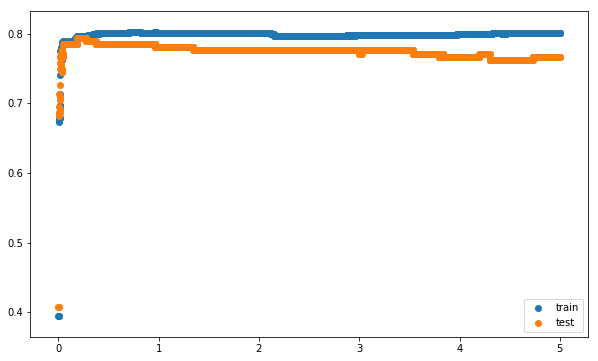

In [81]:
train_score = []
test_score = []

rangeC = []
f = 0.001
while (f<=5):
    rangeC.append(f)
    f = f+0.001
    

for i in rangeC:
    clf = LogisticRegression(random_state = 2, C= i, penalty ='l1' )
    print(i)
    train_clf = clf.fit(X_train,y_train)
#     test_clf = clf.fit(X_test,y_test)
    train_score.append(train_clf.score(X_train,y_train))
    test_score.append(train_clf.score(X_test,y_test))
    
plt.figure(figsize=(10,6))
plt.scatter(rangeC, train_score, label = 'train')
plt.scatter(rangeC, test_score, label = 'test')
plt.legend()
plt.show()